In [186]:
pip install seaborn


[notice] A new release of pip available: 22.1.2 -> 22.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [187]:
import numpy as np
import pandas as pd
pd.set_option("display.max_rows", 20)

import matplotlib.pyplot as plt
import seaborn as sns
import random
from sklearn import metrics
#importing libraries

In [188]:
Initiative= pd.read_csv(r"D:\HAvi\Havi Data\Dimension.DimInitiative.csv")
Item= pd.read_csv(r'D:\HAvi\Havi Data\Dimension.DimItem.csv')
SalesDomain = pd.read_csv(r'D:\HAvi\Havi Data\Dimension.DimSalesDomain.csv')
SalesDomainModified  = pd.read_csv(r'D:\HAvi\Havi Data\Dimension.DimSalesDomainModified.csv')
Actuals = pd.read_csv(r'D:\HAvi\Havi Data\Fact.Actuals.csv')
Holiday = pd.read_csv(r'D:\HAvi\Havi Data\Fact.Holiday.csv')
Promotions = pd.read_csv(r'D:\HAvi\Havi Data\Fact.Promotions.csv')
ExternalDrivers= pd.read_csv(r'D:\HAvi\Havi Data\Fact.ExternalDrivers.csv')

In [189]:
ExternalDrivers

,Version.[Version Name],Time.[Day],Sales Domain.[Sold To],Airport Store,Annual Music Event,CovidConfirmedCases,CovidVaccinationsCompleted,Cubs Team Event,"Disposable Personal Income for USA, SAAR",Lent Impact,Nuggets BTS,PayCheck Release,Per Capita GDP NSA,PPIPharmaRetailPresNSA,Precipitation,Sporting Events,Spring Break Data,Temperature,ThanksGivingWeek
0,CurrentWorkingView,01-Jan-16,86,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,58021.4005,NaN,0.0,NaN,NaN,23.80,NaN
1,CurrentWorkingView,01-Jan-16,706,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,58021.4005,NaN,0.0,NaN,NaN,-10.85,NaN
2,CurrentWorkingView,01-Jan-16,888,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,58021.4005,NaN,0.0,NaN,NaN,-5.00,NaN
3,CurrentWorkingView,01-Jan-16,1443,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,58021.4005,NaN,0.0,NaN,NaN,3.60,NaN
4,CurrentWorkingView,01-Jan-16,2498,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,58021.4005,NaN,0.0,NaN,NaN,5.00,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
146072,CurrentWorkingView,31-Dec-23,36470,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-3.06,NaN
146073,CurrentWorkingView,31-Dec-23,36566,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.40,NaN
146074,CurrentWorkingView,31-Dec-23,37265,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-7.10,NaN
146075,CurrentWorkingView,31-Dec-23,38983,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.85,NaN


In [190]:
Promotions

,Initiative.[Initiative],Version.[Version Name],Time.[Week],Sales Domain.[Sold To],Item.[Planning Item],Promo Scope Association
0,1775043526,CurrentWorkingView,10-Apr-16,86,400004462,1
1,1775043526,CurrentWorkingView,17-Apr-16,86,400004462,1
2,1775043526,CurrentWorkingView,24-Apr-16,86,400004462,1
3,1775043526,CurrentWorkingView,01-May-16,86,400004462,1
4,1775043526,CurrentWorkingView,08-May-16,86,400004462,1
...,...,...,...,...,...,...
99995,3000000010884,CurrentWorkingView,10-Sep-17,11266,400005643,1
99996,3000000010884,CurrentWorkingView,03-Sep-17,12357,400005643,1
99997,3000000010884,CurrentWorkingView,10-Sep-17,12357,400005643,1
99998,3000000010884,CurrentWorkingView,03-Sep-17,12870,400005643,1


In [191]:
Holiday

,Version.[Version Name],Time.[Day],Sales Domain.[Sold To],Holiday Type L0,Is Holiday L0
0,CurrentWorkingView,05-Sep-16,86,Labor Day,1
1,CurrentWorkingView,05-Sep-16,706,Labor Day,1
2,CurrentWorkingView,05-Sep-16,888,Labor Day,1
3,CurrentWorkingView,05-Sep-16,1443,Labor Day,1
4,CurrentWorkingView,05-Sep-16,2498,Labor Day,1
...,...,...,...,...,...
4415,CurrentWorkingView,31-Dec-23,36470,New Year's Eve,1
4416,CurrentWorkingView,31-Dec-23,36566,New Year's Eve,1
4417,CurrentWorkingView,31-Dec-23,37265,New Year's Eve,1
4418,CurrentWorkingView,31-Dec-23,38983,New Year's Eve,1


In [192]:
Actuals

,Version.[Version Name],Time.[Week],Sales Domain.[Sold To],Item.[Planning Item],Sell Out Stat Fcst
0,CurrentWorkingView,31-Jul-16,86,400000000,361.000000
1,CurrentWorkingView,07-Aug-16,86,400000000,374.000000
2,CurrentWorkingView,14-Aug-16,86,400000000,355.000000
3,CurrentWorkingView,21-Aug-16,86,400000000,402.000000
4,CurrentWorkingView,28-Aug-16,86,400000000,359.000000
...,...,...,...,...,...
10870513,CurrentWorkingView,29-Aug-21,39401,400005977,6.593679
10870514,CurrentWorkingView,05-Sep-21,39401,400005977,10.705253
10870515,CurrentWorkingView,12-Sep-21,39401,400005977,5.759580
10870516,CurrentWorkingView,19-Sep-21,39401,400005977,10.616524


In [193]:
SalesDomainModified

,Unnamed: 0,Sales Domain.[Country Image]
0,0,NaN
1,1,NaN
2,2,NaN
3,3,NaN
4,4,NaN
...,...,...
48,48,NaN
49,49,NaN
50,50,NaN
51,51,NaN


In [194]:
SalesDomain

,Sales Domain.[Sold To],Sales Domain.[Sold To Image],Sales Domain.[Sold To Status],Sales Domain.[Sold To$DisplayName],Sales Domain.[Sold To$InActive],Sales Domain.[Sold To$Partition],Sales Domain.[Zip Code],Sales Domain.[Zip Code$DisplayName],Sales Domain.[Zip Code$InActive],Sales Domain.[Zip Code$Partition],...,Sales Domain.[Channel Group],Sales Domain.[Channel Group Image],Sales Domain.[Channel Group$DisplayName],Sales Domain.[Channel Group$InActive],Sales Domain.[Channel Group$Partition],Sales Domain.[Country],Sales Domain.[Country Image],Sales Domain.[Country$DisplayName],Sales Domain.[Country$InActive],Sales Domain.[Country$Partition]
0,10140.0,NaN,NaN,10140.0,NaN,NaN,32819,32819,NaN,NaN,...,15.0,NaN,15.0,NaN,NaN,USA,NaN,USA,NaN,NaN
1,11266.0,NaN,NaN,11266.0,NaN,NaN,32730,32730,NaN,NaN,...,15.0,NaN,15.0,NaN,NaN,USA,NaN,USA,NaN,NaN
2,11945.0,NaN,NaN,11945.0,NaN,NaN,84713,84713,NaN,NaN,...,14.0,NaN,14.0,NaN,NaN,USA,NaN,USA,NaN,NaN
3,12357.0,NaN,NaN,12357.0,NaN,NaN,32256,32256,NaN,NaN,...,15.0,NaN,15.0,NaN,NaN,USA,NaN,USA,NaN,NaN
4,12449.0,NaN,NaN,12449.0,NaN,NaN,11372,11372,NaN,NaN,...,42.0,NaN,42.0,NaN,NaN,USA,NaN,USA,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48,86.0,NaN,NaN,86.0,NaN,NaN,33629,33629,NaN,NaN,...,15.0,NaN,15.0,NaN,NaN,USA,NaN,USA,NaN,NaN
49,888.0,NaN,NaN,888.0,NaN,NaN,60123,60123,NaN,NaN,...,99.0,NaN,99.0,NaN,NaN,USA,NaN,USA,NaN,NaN
50,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
51,NaN,NaN,NaN,NaN,NaN,NaN,zz_NONE,zz_NONE,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [195]:
Item

,Item.[A3],Item.[A3$DisplayName],Item.[A3$InActive],Item.[A3$Partition],Item.[L5],Item.[L5 Image],Item.[L5$DisplayName],Item.[L5$InActive],Item.[L5$Partition],Item.[A12],...,Item.[Transition Group$Partition],Item.[Stat Item],Item.[Stat Item$DisplayName],Item.[Stat Item$InActive],Item.[Stat Item$Partition],Item.[L3],Item.[L3 Image],Item.[L3$DisplayName],Item.[L3$InActive],Item.[L3$Partition]
0,zz_NONE,zz_NONE,NaN,NaN,405000000,NaN,0405000000-ENTREES,NaN,NaN,zz_NONE,...,NaN,105050505,105050505,NaN,NaN,305050000,NaN,0305050000-SANDWICHES,NaN,NaN
1,zz_NONE,zz_NONE,NaN,NaN,405000000,NaN,0405000000-ENTREES,NaN,NaN,zz_NONE,...,NaN,105050565,105050565,NaN,NaN,305050000,NaN,0305050000-SANDWICHES,NaN,NaN
2,zz_NONE,zz_NONE,NaN,NaN,405000000,NaN,0405000000-ENTREES,NaN,NaN,zz_NONE,...,NaN,105050510,105050510,NaN,NaN,305050000,NaN,0305050000-SANDWICHES,NaN,NaN
3,zz_NONE,zz_NONE,NaN,NaN,405000000,NaN,0405000000-ENTREES,NaN,NaN,zz_NONE,...,NaN,105050565,105050565,NaN,NaN,305050000,NaN,0305050000-SANDWICHES,NaN,NaN
4,zz_NONE,zz_NONE,NaN,NaN,405000000,NaN,0405000000-ENTREES,NaN,NaN,zz_NONE,...,NaN,105050535,105050535,NaN,NaN,305050000,NaN,0305050000-SANDWICHES,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6072,zz_NONE,zz_NONE,NaN,NaN,470000000,NaN,0470000000-MISCELLANEOUS ITEMS,NaN,NaN,zz_NONE,...,NaN,170500505,170500505,NaN,NaN,370500000,NaN,0370500000-SALAD DRESSINGS,NaN,NaN
6073,zz_NONE,zz_NONE,NaN,NaN,480000000,NaN,0480000000-PROMOTIONAL,NaN,NaN,zz_NONE,...,NaN,180100505,180100505,NaN,NaN,380100000,NaN,0380100000-NON-PRODUCT,NaN,NaN
6074,zz_NONE,zz_NONE,NaN,NaN,405000000,NaN,0405000000-ENTREES,NaN,NaN,zz_NONE,...,NaN,105050545,105050545,NaN,NaN,305050000,NaN,0305050000-SANDWICHES,NaN,NaN
6075,zz_NONE,zz_NONE,NaN,NaN,405000000,NaN,0405000000-ENTREES,NaN,NaN,zz_NONE,...,NaN,105050580,105050580,NaN,NaN,305050000,NaN,0305050000-SANDWICHES,NaN,NaN


In [196]:
Initiative

,Initiative.[Initiative Location Type],Initiative.[Initiative Location Type$DisplayName],Initiative.[Initiative Location Type$InActive],Initiative.[Initiative Location Type$Partition],Initiative.[Initiative Category],Initiative.[Initiative Category$DisplayName],Initiative.[Initiative Category$InActive],Initiative.[Initiative Category$Partition],Initiative.[Initiative],Initiative.[Initiative$DisplayName],Initiative.[Initiative$InActive],Initiative.[Initiative$Partition],Initiative.[Initiative Type],Initiative.[Initiative Type$DisplayName],Initiative.[Initiative Type$InActive],Initiative.[Initiative Type$Partition]
0,National,National,NaN,NaN,Trade Promotions,Trade Promotions,NaN,NaN,1000000070637,1000000070637,NaN,NaN,ILSPROMO,ILSPROMO,NaN,NaN
1,National,National,NaN,NaN,Trade Promotions,Trade Promotions,NaN,NaN,1000000070638,1000000070638,NaN,NaN,ILSPROMO,ILSPROMO,NaN,NaN
2,National,National,NaN,NaN,Trade Promotions,Trade Promotions,NaN,NaN,1000000070639,1000000070639,NaN,NaN,ILSPROMO,ILSPROMO,NaN,NaN
3,National,National,NaN,NaN,Trade Promotions,Trade Promotions,NaN,NaN,1000000070640,1000000070640,NaN,NaN,ILSPROMO,ILSPROMO,NaN,NaN
4,National,National,NaN,NaN,Trade Promotions,Trade Promotions,NaN,NaN,1000000070641,1000000070641,NaN,NaN,ILSPROMO,ILSPROMO,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79958,SACO,SACO,NaN,NaN,Marketing,Marketing,NaN,NaN,9860699727,9860699727,NaN,NaN,Regular Advertised Price,Regular Advertised Price,NaN,NaN
79959,SACO,SACO,NaN,NaN,Marketing,Marketing,NaN,NaN,9897859283,9897859283,NaN,NaN,Free Item,Free Item,NaN,NaN
79960,SACO,SACO,NaN,NaN,Marketing,Marketing,NaN,NaN,9948010289,9948010289,NaN,NaN,Discounted Price,Discounted Price,NaN,NaN
79961,SACO,SACO,NaN,NaN,Marketing,Marketing,NaN,NaN,9980090504,9980090504,NaN,NaN,Bundled Price,Bundled Price,NaN,NaN


In [197]:
emptycols =[]
for i in Item.columns:
  if Item[i].isnull().sum() == 6077:
   emptycols.append(i)
   
Item.drop(emptycols,axis =1, inplace =True)

In [198]:
Item.nunique()

Holiday['Holiday Type L0'] = Holiday['Holiday Type L0'].str.replace("New Year's Day", "New Year's Day Holiday") 

In [199]:
Actuals['Time.[Week]'] = pd.to_datetime(Actuals['Time.[Week]'])
Actuals['Year'] = Actuals['Time.[Week]'].apply(lambda date: date.year)
Actuals['Month'] = Actuals['Time.[Week]'].apply(lambda date: date.month)
Actuals['Week'] = Actuals['Time.[Week]'].apply(lambda date: date.week)


In [200]:
Promotions['Time.[Week]'] = pd.to_datetime(Promotions['Time.[Week]'])
Promotions['Year'] = Promotions['Time.[Week]'].apply(lambda date: date.year)
Promotions['Month'] = Promotions['Time.[Week]'].apply(lambda date: date.month)
Promotions['Week'] = Promotions['Time.[Week]'].apply(lambda date: date.week)
Holiday['Time.[Day]'] = pd.to_datetime(Holiday['Time.[Day]'])
Holiday['Year'] = Holiday['Time.[Day]'].apply(lambda date: date.year)
Holiday['Month'] = Holiday['Time.[Day]'].apply(lambda date: date.month)
Holiday['Week'] = Holiday['Time.[Day]'].apply(lambda date: date.week)
Actuals['Time.[Week]'] = pd.to_datetime(Actuals['Time.[Week]'])
Actuals['Year'] = Actuals['Time.[Week]'].apply(lambda date: date.year)
Actuals['Month'] = Actuals['Time.[Week]'].apply(lambda date: date.month)
Actuals['Week'] = Actuals['Time.[Week]'].apply(lambda date: date.week)
hol=Holiday.drop(['Version.[Version Name]','Sales Domain.[Sold To]','Time.[Day]'],axis=1)
hol=hol.drop_duplicates(keep='first')


In [201]:
hol

,Holiday Type L0,Is Holiday L0,Year,Month,Week
0,Labor Day,1,2016,9,36
50,Veterans Day,1,2016,11,45
100,Thanksgiving,1,2016,11,47
150,Christmas Eve,1,2016,12,51
200,Christmas,1,2016,12,51
...,...,...,...,...,...
4130,Veterans Day,1,2023,11,45
4230,Thanksgiving,1,2023,11,47
4280,Christmas Eve,1,2023,12,51
4320,Christmas,1,2023,12,52


In [202]:
Actuals

,Version.[Version Name],Time.[Week],Sales Domain.[Sold To],Item.[Planning Item],Sell Out Stat Fcst,Year,Month,Week
0,CurrentWorkingView,2016-07-31,86,400000000,361.000000,2016,7,30
1,CurrentWorkingView,2016-08-07,86,400000000,374.000000,2016,8,31
2,CurrentWorkingView,2016-08-14,86,400000000,355.000000,2016,8,32
3,CurrentWorkingView,2016-08-21,86,400000000,402.000000,2016,8,33
4,CurrentWorkingView,2016-08-28,86,400000000,359.000000,2016,8,34
...,...,...,...,...,...,...,...,...
10870513,CurrentWorkingView,2021-08-29,39401,400005977,6.593679,2021,8,34
10870514,CurrentWorkingView,2021-09-05,39401,400005977,10.705253,2021,9,35
10870515,CurrentWorkingView,2021-09-12,39401,400005977,5.759580,2021,9,36
10870516,CurrentWorkingView,2021-09-19,39401,400005977,10.616524,2021,9,37


In [203]:
df_main = pd.merge(Actuals, hol,on=['Year','Week'] ,how = 'left')

In [204]:
df_main=df_main.drop(['Month_y'],axis=1)
df_main['Is Holiday L0']=df_main['Is Holiday L0'].fillna(0)
df_main['Holiday Type L0']=df_main['Holiday Type L0'].fillna('Not a Holiday')


In [205]:
Promotions=Promotions.drop_duplicates(keep='first')

In [206]:
Initiative.dropna(axis=1, how='all')
Item=Item.dropna(axis=1, how='all')


In [207]:
Item = Item.select_dtypes(exclude=['object'])

In [208]:
Item=Item.T.drop_duplicates().T

In [209]:
Item=Item.drop(['Item.[L5]','Item.[L2]','Item.[L3]'],axis=1)

In [210]:
df_main1=pd.merge(df_main, Item, on = 'Item.[Planning Item]', how = 'left')

In [211]:
df_main1

,Version.[Version Name],Time.[Week],Sales Domain.[Sold To],Item.[Planning Item],Sell Out Stat Fcst,Year,Month_x,Week,Holiday Type L0,Is Holiday L0,Item.[L1]
0,CurrentWorkingView,2016-07-31,86,400000000,361.000000,2016,7,30,Not a Holiday,0.0,105050505
1,CurrentWorkingView,2016-08-07,86,400000000,374.000000,2016,8,31,Not a Holiday,0.0,105050505
2,CurrentWorkingView,2016-08-14,86,400000000,355.000000,2016,8,32,Not a Holiday,0.0,105050505
3,CurrentWorkingView,2016-08-21,86,400000000,402.000000,2016,8,33,Not a Holiday,0.0,105050505
4,CurrentWorkingView,2016-08-28,86,400000000,359.000000,2016,8,34,Not a Holiday,0.0,105050505
...,...,...,...,...,...,...,...,...,...,...,...
11014805,CurrentWorkingView,2021-08-29,39401,400005977,6.593679,2021,8,34,Not a Holiday,0.0,125052010
11014806,CurrentWorkingView,2021-09-05,39401,400005977,10.705253,2021,9,35,Not a Holiday,0.0,125052010
11014807,CurrentWorkingView,2021-09-12,39401,400005977,5.759580,2021,9,36,Labor Day,1.0,125052010
11014808,CurrentWorkingView,2021-09-19,39401,400005977,10.616524,2021,9,37,Not a Holiday,0.0,125052010


In [212]:
new_item_list = pd.read_csv(r'D:\HAvi\Havi Data\new_item_list.csv')

In [213]:
new_item_list.drop(['Unnamed: 0'], axis =1, inplace = True)


In [214]:
df_new_item = pd.merge(df_main1,new_item_list, on ='Item.[Planning Item]', how = 'inner')

In [215]:
df_new_item

,Version.[Version Name],Time.[Week],Sales Domain.[Sold To],Item.[Planning Item],Sell Out Stat Fcst,Year,Month_x,Week,Holiday Type L0,Is Holiday L0,Item.[L1]
0,CurrentWorkingView,2016-07-31,86,400000000,361.000000,2016,7,30,Not a Holiday,0.0,105050505
1,CurrentWorkingView,2016-08-07,86,400000000,374.000000,2016,8,31,Not a Holiday,0.0,105050505
2,CurrentWorkingView,2016-08-14,86,400000000,355.000000,2016,8,32,Not a Holiday,0.0,105050505
3,CurrentWorkingView,2016-08-21,86,400000000,402.000000,2016,8,33,Not a Holiday,0.0,105050505
4,CurrentWorkingView,2016-08-28,86,400000000,359.000000,2016,8,34,Not a Holiday,0.0,105050505
...,...,...,...,...,...,...,...,...,...,...,...
3368998,CurrentWorkingView,2021-08-29,39401,400000598,13.885702,2021,8,34,Not a Holiday,0.0,190050505
3368999,CurrentWorkingView,2021-09-05,39401,400000598,9.652564,2021,9,35,Not a Holiday,0.0,190050505
3369000,CurrentWorkingView,2021-09-12,39401,400000598,7.910061,2021,9,36,Labor Day,1.0,190050505
3369001,CurrentWorkingView,2021-09-19,39401,400000598,8.433817,2021,9,37,Not a Holiday,0.0,190050505


In [216]:
import copy
df_new_item_planning = copy.deepcopy(df_new_item)
df_new_item_sales_domain = copy.deepcopy(df_new_item)

In [217]:
df_new_item_planning['logret_planning'] = df_new_item_planning.groupby("Item.[Planning Item]")['Sell Out Stat Fcst'].apply(lambda x: np.log(x) - np.log(x.shift()))
df_new_item_planning
df_new_item_sales_domain['logret_salesdom'] = df_new_item_sales_domain.groupby("Sales Domain.[Sold To]")['Sell Out Stat Fcst'].apply(lambda x: np.log(x) - np.log(x.shift()))

In [218]:
df_new_item_planning

,Version.[Version Name],Time.[Week],Sales Domain.[Sold To],Item.[Planning Item],Sell Out Stat Fcst,Year,Month_x,Week,Holiday Type L0,Is Holiday L0,Item.[L1],logret_planning
0,CurrentWorkingView,2016-07-31,86,400000000,361.000000,2016,7,30,Not a Holiday,0.0,105050505,NaN
1,CurrentWorkingView,2016-08-07,86,400000000,374.000000,2016,8,31,Not a Holiday,0.0,105050505,0.035378
2,CurrentWorkingView,2016-08-14,86,400000000,355.000000,2016,8,32,Not a Holiday,0.0,105050505,-0.052138
3,CurrentWorkingView,2016-08-21,86,400000000,402.000000,2016,8,33,Not a Holiday,0.0,105050505,0.124334
4,CurrentWorkingView,2016-08-28,86,400000000,359.000000,2016,8,34,Not a Holiday,0.0,105050505,-0.113130
...,...,...,...,...,...,...,...,...,...,...,...,...
3368998,CurrentWorkingView,2021-08-29,39401,400000598,13.885702,2021,8,34,Not a Holiday,0.0,190050505,-0.117216
3368999,CurrentWorkingView,2021-09-05,39401,400000598,9.652564,2021,9,35,Not a Holiday,0.0,190050505,-0.363636
3369000,CurrentWorkingView,2021-09-12,39401,400000598,7.910061,2021,9,36,Labor Day,1.0,190050505,-0.199088
3369001,CurrentWorkingView,2021-09-19,39401,400000598,8.433817,2021,9,37,Not a Holiday,0.0,190050505,0.064114


In [219]:
df_new_item_sales_domain

,Version.[Version Name],Time.[Week],Sales Domain.[Sold To],Item.[Planning Item],Sell Out Stat Fcst,Year,Month_x,Week,Holiday Type L0,Is Holiday L0,Item.[L1],logret_salesdom
0,CurrentWorkingView,2016-07-31,86,400000000,361.000000,2016,7,30,Not a Holiday,0.0,105050505,NaN
1,CurrentWorkingView,2016-08-07,86,400000000,374.000000,2016,8,31,Not a Holiday,0.0,105050505,0.035378
2,CurrentWorkingView,2016-08-14,86,400000000,355.000000,2016,8,32,Not a Holiday,0.0,105050505,-0.052138
3,CurrentWorkingView,2016-08-21,86,400000000,402.000000,2016,8,33,Not a Holiday,0.0,105050505,0.124334
4,CurrentWorkingView,2016-08-28,86,400000000,359.000000,2016,8,34,Not a Holiday,0.0,105050505,-0.113130
...,...,...,...,...,...,...,...,...,...,...,...,...
3368998,CurrentWorkingView,2021-08-29,39401,400000598,13.885702,2021,8,34,Not a Holiday,0.0,190050505,-0.117216
3368999,CurrentWorkingView,2021-09-05,39401,400000598,9.652564,2021,9,35,Not a Holiday,0.0,190050505,-0.363636
3369000,CurrentWorkingView,2021-09-12,39401,400000598,7.910061,2021,9,36,Labor Day,1.0,190050505,-0.199088
3369001,CurrentWorkingView,2021-09-19,39401,400000598,8.433817,2021,9,37,Not a Holiday,0.0,190050505,0.064114


In [220]:
item_planning = df_new_item['Sales Domain.[Sold To]'].unique()
number_time = []
for i in item_planning:
      lol2 = df_new_item[df_new_item['Sales Domain.[Sold To]']==i]
      number_time.append(lol2.nunique()['Time.[Week]'])
list_of_tuples = list(zip(item_planning,number_time ))
df_salesdom_timestamps_planning = pd.DataFrame(list_of_tuples,
                  columns = ['Sales Domain.[Sold To]', 'Number of timestamps'])

In [221]:
df_salesdom_timestamps_planning

,Sales Domain.[Sold To],Number of timestamps
0,86,270
1,706,270
2,888,270
3,1443,245
4,2498,270
...,...,...
45,36470,255
46,36566,270
47,37265,270
48,38983,101


In [222]:
item_planning = df_new_item['Item.[Planning Item]'].unique()
number_time = []
for i in item_planning:
      lol2 = df_new_item[df_new_item['Item.[Planning Item]']==i]
      number_time.append(lol2.nunique()['Time.[Week]'])
list_of_tuples = list(zip(item_planning,number_time ))
df_item_timestamps_planning = pd.DataFrame(list_of_tuples,
                  columns = ['Item.[Planning Item]', 'Number of timestamps'])

In [223]:
df_item_timestamps_planning

,Item.[Planning Item],Number of timestamps
0,400000000,270
1,400000002,270
2,400001496,270
3,400000004,270
4,400000005,270
...,...,...
336,400003357,270
337,400002878,270
338,400002879,270
339,400005216,270


By Item codes 

In [224]:
df_new_item_planning.reset_index().groupby(['Time.[Week]','Item.[Planning Item]'])['Sell Out Stat Fcst'].sum().to_csv('sumplanning item.csv')

In [225]:
returns = pd.read_csv("sumplanning item.csv")
returns

,Time.[Week],Item.[Planning Item],Sell Out Stat Fcst
0,2016-07-31,400000000,11817.000000
1,2016-07-31,400000001,709.000000
2,2016-07-31,400000002,53794.000000
3,2016-07-31,400000003,27213.000000
4,2016-07-31,400000004,26497.000000
...,...,...,...
92065,2021-09-26,400005486,1043.080439
92066,2021-09-26,400005868,142.918348
92067,2021-09-26,400005869,381.783114
92068,2021-09-26,400005870,1019.491701


In [226]:
returns['logret_planning'] = returns.groupby("Item.[Planning Item]")['Sell Out Stat Fcst'].apply(lambda x: np.log(x) - np.log(x.shift()))
returns

,Time.[Week],Item.[Planning Item],Sell Out Stat Fcst,logret_planning
0,2016-07-31,400000000,11817.000000,NaN
1,2016-07-31,400000001,709.000000,NaN
2,2016-07-31,400000002,53794.000000,NaN
3,2016-07-31,400000003,27213.000000,NaN
4,2016-07-31,400000004,26497.000000,NaN
...,...,...,...,...
92065,2021-09-26,400005486,1043.080439,0.000399
92066,2021-09-26,400005868,142.918348,-0.116602
92067,2021-09-26,400005869,381.783114,-0.090863
92068,2021-09-26,400005870,1019.491701,-0.089111


In [227]:
returns

,Time.[Week],Item.[Planning Item],Sell Out Stat Fcst,logret_planning
0,2016-07-31,400000000,11817.000000,NaN
1,2016-07-31,400000001,709.000000,NaN
2,2016-07-31,400000002,53794.000000,NaN
3,2016-07-31,400000003,27213.000000,NaN
4,2016-07-31,400000004,26497.000000,NaN
...,...,...,...,...
92065,2021-09-26,400005486,1043.080439,0.000399
92066,2021-09-26,400005868,142.918348,-0.116602
92067,2021-09-26,400005869,381.783114,-0.090863
92068,2021-09-26,400005870,1019.491701,-0.089111


In [228]:
returns.index = pd.DatetimeIndex(returns['Time.[Week]'])

In [229]:
returns

,Time.[Week],Item.[Planning Item],Sell Out Stat Fcst,logret_planning
Time.[Week],,,,
2016-07-31,2016-07-31,400000000,11817.000000,NaN
2016-07-31,2016-07-31,400000001,709.000000,NaN
2016-07-31,2016-07-31,400000002,53794.000000,NaN
2016-07-31,2016-07-31,400000003,27213.000000,NaN
2016-07-31,2016-07-31,400000004,26497.000000,NaN
...,...,...,...,...
2021-09-26,2021-09-26,400005486,1043.080439,0.000399
2021-09-26,2021-09-26,400005868,142.918348,-0.116602
2021-09-26,2021-09-26,400005869,381.783114,-0.090863


In [230]:
# import pandas as pd
# import numpy as np
from sklearn.cluster import AgglomerativeClustering
# from sklearn.linear_model import LinearRegression
# from sklearn.ensemble import RandomForestRegressor
# from sklearn.metrics import mean_squared_error, r2_score
# from sklearn.model_selection import GridSearchCV, TimeSeriesSplit

# # Load time series data
# data = returns

# # Extract the time series data for each item
# item_data = X_
# from sklearn.metrics import silhouette_score

# # Determine the optimal number of clusters using silhouette score
# agg_clustering = AgglomerativeClustering()
# param_grid = {'n_clusters': range(2, 111), 'linkage': ['average', 'ward', 'complete'], 'affinity': ['euclidean']}
# best_score = -1
# best_params = None
# for n_clusters in param_grid['n_clusters']:
#     for linkage in param_grid['linkage']:
#         for affinity in param_grid['affinity']:
#             agg_clustering.set_params(n_clusters=n_clusters, linkage=linkage, affinity=affinity)
#             cluster_labels = agg_clustering.fit_predict(X_)
#             score = silhouette_score(item_data, cluster_labels)
#             print(score)
#             if score > best_score:
#                 best_score = score
#                 best_params = {'n_clusters': n_clusters, 'linkage': linkage, 'affinity': affinity}

# print(best_params)

In [231]:
# X_

In [232]:
# best_params

In [233]:
# X_

In [234]:
# results

In [235]:
# agg_clustering = AgglomerativeClustering(n_clusters = 99, linkage= 'average',affinity= 'euclidean')
# cluster_labels = agg_clustering.fit_predict(X_)
# cluster_labels

# # Create a dictionary to store the clusters and the corresponding items
# clusters = {}
# for i in range(len(cluster_labels)):
#     if cluster_labels[i] not in clusters:
#         clusters[cluster_labels[i]] = []
#     clusters[cluster_labels[i]].append(item_data.index[i])

In [236]:
import pandas as pd
import numpy as np
import datetime as dt
# import pandas_datareader as pdr
import seaborn as sns
import matplotlib.pyplot as plt
# import bs4 as bs
import requests
from IPython.display import clear_output
from scipy.stats import mstats
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.model_selection import RandomizedSearchCV, validation_curve, TimeSeriesSplit
from sklearn.ensemble import RandomForestClassifier
import pickle
import os
from sklearn.model_selection import GridSearchCV

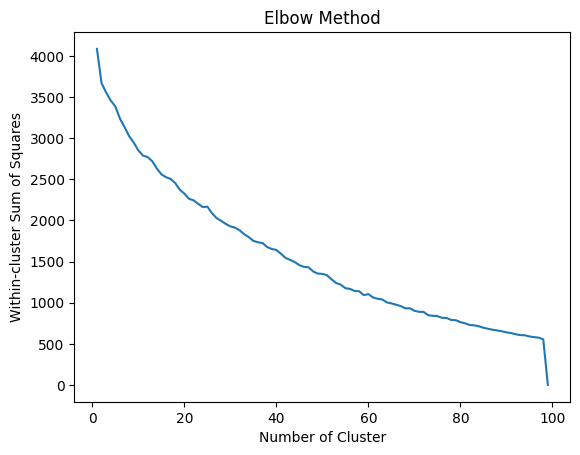

In [237]:
transposed = returns.pivot(index = 'Time.[Week]', columns = 'Item.[Planning Item]', values = 'logret_planning')
X = transposed.dropna().transpose()
sum_of_sq = np.zeros([100, 1])
for k in range(1, 100):
    sum_of_sq[k-1] = KMeans(n_clusters=k).fit(X).inertia_
    
plt.plot(range(1, 100), sum_of_sq[1:100])
plt.title("Elbow Method") 
plt.xlabel("Number of Cluster") 
plt.ylabel("Within-cluster Sum of Squares")

pd.DataFrame(sum_of_sq, columns = ['Difference in SS'], index = range(1,101)).diff().to_csv('Elbow_clusters.csv')

In [238]:
from sklearn.mixture import GaussianMixture


gmm = GaussianMixture(n_components = 10)
gmm.fit(transposed.dropna().transpose())

clusters = gmm.predict(transposed.dropna().transpose())

clusters_df = pd.DataFrame({'Cluster':clusters,
                           'Item.[Planning Item]':transposed.columns})
clusters_df = clusters_df.sort_values(['Cluster']).reset_index(drop = True)

clusters_df.to_csv("clusters.csv")


In [239]:
from sklearn.cluster import AgglomerativeClustering
import numpy as np

# Create an example time series data
data = transposed.dropna().transpose()

# Initialize the AgglomerativeClustering model
agg_clustering = AgglomerativeClustering(n_clusters=5, linkage= 'average',affinity= 'euclidean')

# Fit the model to the data
agg_clustering.fit(data)

# Get the cluster labels for each data point
cluster_labels = agg_clustering.labels_

clusters_df_agglom = pd.DataFrame({'Cluster':cluster_labels,
                           'Item.[Planning Item]':transposed.columns})
# Print the cluster labels
print(clusters_df_agglom)


     Cluster  Item.[Planning Item]
0          0             400000000
1          0             400000001
2          0             400000002
3          0             400000003
4          0             400000004
..       ...                   ...
336        0             400005486
337        0             400005868
338        0             400005869
339        0             400005870
340        0             400005871

[341 rows x 2 columns]


In [240]:
returns_gmm = pd.merge(returns, clusters_df, on='Item.[Planning Item]')
grouped_data_gmm = returns_gmm.groupby(['Time.[Week]','Cluster'])['Sell Out Stat Fcst'].sum()

In [241]:
returns_hir = pd.merge(returns, clusters_df_agglom, on='Item.[Planning Item]')
grouped_data_hir = returns_hir.groupby(['Time.[Week]','Cluster'])['Sell Out Stat Fcst'].sum()

In [242]:
grouped_data_gmm.to_csv('grouped_data_gmm.csv')
grouped_data_hir.to_csv('grouped_data_hir.csv')

In [243]:
grouped_data_gmm = pd.read_csv('grouped_data_gmm.csv')
grouped_data_hir = pd.read_csv('grouped_data_hir.csv')

In [244]:
grouped_data_hir.index = pd.DatetimeIndex(grouped_data_hir['Time.[Week]'])
grouped_data_gmm.index = pd.DatetimeIndex(grouped_data_gmm['Time.[Week]'])
grouped_data_gmm['Time.[Week]'] = pd.to_datetime(grouped_data_gmm['Time.[Week]'])
grouped_data_hir['Time.[Week]'] = pd.to_datetime(grouped_data_hir['Time.[Week]'])


In [245]:
grouped_data_gmm[grouped_data_gmm['Cluster'] == 1]

,Time.[Week],Cluster,Sell Out Stat Fcst
Time.[Week],,,
2016-07-31,2016-07-31,1,2211.000000
2016-08-07,2016-08-07,1,2417.000000
2016-08-14,2016-08-14,1,2458.000000
2016-08-21,2016-08-21,1,2436.000000
2016-08-28,2016-08-28,1,2323.000000
...,...,...,...
2021-08-29,2021-08-29,1,726.046583
2021-09-05,2021-09-05,1,516.684110
2021-09-12,2021-09-12,1,471.302393


In [246]:
grouped_data_gmm

,Time.[Week],Cluster,Sell Out Stat Fcst
Time.[Week],,,
2016-07-31,2016-07-31,0,6.900000e+03
2016-07-31,2016-07-31,1,2.211000e+03
2016-07-31,2016-07-31,2,6.000000e+00
2016-07-31,2016-07-31,3,1.624832e+06
2016-07-31,2016-07-31,4,4.060000e+02
...,...,...,...
2021-09-26,2021-09-26,5,1.149961e+03
2021-09-26,2021-09-26,6,3.507310e+02
2021-09-26,2021-09-26,7,2.925384e+02


In [247]:
grouped_data_gmm[grouped_data_gmm['Cluster'] == 1]

,Time.[Week],Cluster,Sell Out Stat Fcst
Time.[Week],,,
2016-07-31,2016-07-31,1,2211.000000
2016-08-07,2016-08-07,1,2417.000000
2016-08-14,2016-08-14,1,2458.000000
2016-08-21,2016-08-21,1,2436.000000
2016-08-28,2016-08-28,1,2323.000000
...,...,...,...
2021-08-29,2021-08-29,1,726.046583
2021-09-05,2021-09-05,1,516.684110
2021-09-12,2021-09-12,1,471.302393


In [248]:
grouped_data_gmm["lag1"] = grouped_data_gmm.groupby('Cluster')['Sell Out Stat Fcst'].shift(1)
grouped_data_gmm["lag2"] = grouped_data_gmm.groupby('Cluster')['Sell Out Stat Fcst'].shift(2)
grouped_data_gmm['ROC'] = ((grouped_data_gmm['lag1'] - grouped_data_gmm['lag2'])/(grouped_data_gmm['lag1']))*100
grouped_data_hir["lag1"] = grouped_data_hir.groupby('Cluster')['Sell Out Stat Fcst'].shift(1)
grouped_data_hir["lag2"] = grouped_data_hir.groupby('Cluster')['Sell Out Stat Fcst'].shift(2)
grouped_data_hir['ROC'] = ((grouped_data_hir['lag1'] - grouped_data_hir['lag2'])/(grouped_data_hir['lag1']))*100


In [249]:
grouped_data_gmm[grouped_data_gmm['Cluster'] == 0]

,Time.[Week],Cluster,Sell Out Stat Fcst,lag1,lag2,ROC
Time.[Week],,,,,,
2016-07-31,2016-07-31,0,6900.000000,NaN,NaN,NaN
2016-08-07,2016-08-07,0,6949.000000,6900.000000,NaN,NaN
2016-08-14,2016-08-14,0,8180.000000,6949.000000,6900.000000,0.705137
2016-08-21,2016-08-21,0,6860.000000,8180.000000,6949.000000,15.048900
2016-08-28,2016-08-28,0,5554.000000,6860.000000,8180.000000,-19.241983
...,...,...,...,...,...,...
2021-08-29,2021-08-29,0,2363.279903,2372.587343,2388.178113,-0.657121
2021-09-05,2021-09-05,0,2135.025655,2363.279903,2372.587343,-0.393836
2021-09-12,2021-09-12,0,2082.233842,2135.025655,2363.279903,-10.690937


In [250]:
grouped_data_gmm.columns

Index(['Time.[Week]', 'Cluster', 'Sell Out Stat Fcst', 'lag1', 'lag2', 'ROC'], dtype='object')

In [251]:
# X = grouped_data_gmm[["Time.[Week]",'lag1', 'lag2', 'ROC','Cluster']]
# Y = grouped_data_gmm[['Sell Out Stat Fcst','ROC','Cluster']]
# X.dropna(axis = 0, inplace = True)
# Y.dropna(axis= 0, inplace= True)
# Y.drop(['ROC'], axis= 1, inplace= True)

In [252]:
grouped_data_gmm.dropna(axis = 0, inplace = True)

In [253]:
grouped_data_gmm

,Time.[Week],Cluster,Sell Out Stat Fcst,lag1,lag2,ROC
Time.[Week],,,,,,
2016-08-14,2016-08-14,0,8.180000e+03,6.949000e+03,6.900000e+03,0.705137
2016-08-14,2016-08-14,1,2.458000e+03,2.417000e+03,2.211000e+03,8.522962
2016-08-14,2016-08-14,2,1.900000e+01,7.000000e+00,6.000000e+00,14.285714
2016-08-14,2016-08-14,3,1.793659e+06,1.817407e+06,1.624832e+06,10.596141
2016-08-14,2016-08-14,4,1.476000e+03,2.281000e+03,4.060000e+02,82.200789
...,...,...,...,...,...,...
2021-09-26,2021-09-26,5,1.149961e+03,1.150134e+03,1.183893e+03,-2.935243
2021-09-26,2021-09-26,6,3.507310e+02,3.904939e+02,4.392356e+02,-12.482078
2021-09-26,2021-09-26,7,2.925384e+02,3.121418e+02,3.403680e+02,-9.042743


In [254]:
scorekeeper_gmm_clusterwise = pd.DataFrame(columns= ['Cluster','Mean Absolute Error','Root Mean Squared Error','R2 Score','wape'])
scorekeeper_gmm_clusterwise

,Cluster,Mean Absolute Error,Root Mean Squared Error,R2 Score,wape


In [255]:
gmm_predictions = pd.DataFrame()

Mean Absolute Error: 941.8920590199239
Root Mean Squared Error: 1456
R2 Score: -1.5705619362925596
wape: 0.42848703497115315


C:\Users\Mayrip\AppData\Local\Temp\ipykernel_9956\1923795156.py:35: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  scorekeeper_gmm_clusterwise = scorekeeper_gmm_clusterwise.append({'Cluster' : i, 'Mean Absolute Error' :  metrics.mean_absolute_error(y_test, clf_pred) ,
C:\Users\Mayrip\AppData\Local\Temp\ipykernel_9956\1923795156.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  gmm_predictions = gmm_predictions.append(rf_pr)


Mean Absolute Error: 68.27052785403723
Root Mean Squared Error: 121
R2 Score: 0.6110511888904997
wape: 0.1442741196674244
Mean Absolute Error: 457.6844997213172
Root Mean Squared Error: 824
R2 Score: -0.1289335779423948
wape: 1.930089151700114


C:\Users\Mayrip\AppData\Local\Temp\ipykernel_9956\1923795156.py:35: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  scorekeeper_gmm_clusterwise = scorekeeper_gmm_clusterwise.append({'Cluster' : i, 'Mean Absolute Error' :  metrics.mean_absolute_error(y_test, clf_pred) ,
C:\Users\Mayrip\AppData\Local\Temp\ipykernel_9956\1923795156.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  gmm_predictions = gmm_predictions.append(rf_pr)
C:\Users\Mayrip\AppData\Local\Temp\ipykernel_9956\1923795156.py:35: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  scorekeeper_gmm_clusterwise = scorekeeper_gmm_clusterwise.append({'Cluster' : i, 'Mean Absolute Error' :  metrics.mean_absolute_error(y_test, clf_pred) ,
C:\Users\Mayrip\AppData\Local\Temp\

Mean Absolute Error: 243441.83609568598
Root Mean Squared Error: 549139
R2 Score: -1.9570181774120297
wape: 0.12917075631410643
Mean Absolute Error: 765.8156699033203
Root Mean Squared Error: 1060
R2 Score: -0.20435151199386725
wape: 0.6836253737329869


C:\Users\Mayrip\AppData\Local\Temp\ipykernel_9956\1923795156.py:35: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  scorekeeper_gmm_clusterwise = scorekeeper_gmm_clusterwise.append({'Cluster' : i, 'Mean Absolute Error' :  metrics.mean_absolute_error(y_test, clf_pred) ,
C:\Users\Mayrip\AppData\Local\Temp\ipykernel_9956\1923795156.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  gmm_predictions = gmm_predictions.append(rf_pr)
C:\Users\Mayrip\AppData\Local\Temp\ipykernel_9956\1923795156.py:35: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  scorekeeper_gmm_clusterwise = scorekeeper_gmm_clusterwise.append({'Cluster' : i, 'Mean Absolute Error' :  metrics.mean_absolute_error(y_test, clf_pred) ,
C:\Users\Mayrip\AppData\Local\Temp\

Mean Absolute Error: 1084.7348581054603
Root Mean Squared Error: 1812
R2 Score: -0.24760987340775653
wape: 0.7131283238705975
Mean Absolute Error: 358.83854355794296
Root Mean Squared Error: 475
R2 Score: -0.1961719347507942
wape: 0.3199366468284541


C:\Users\Mayrip\AppData\Local\Temp\ipykernel_9956\1923795156.py:35: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  scorekeeper_gmm_clusterwise = scorekeeper_gmm_clusterwise.append({'Cluster' : i, 'Mean Absolute Error' :  metrics.mean_absolute_error(y_test, clf_pred) ,
C:\Users\Mayrip\AppData\Local\Temp\ipykernel_9956\1923795156.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  gmm_predictions = gmm_predictions.append(rf_pr)
C:\Users\Mayrip\AppData\Local\Temp\ipykernel_9956\1923795156.py:35: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  scorekeeper_gmm_clusterwise = scorekeeper_gmm_clusterwise.append({'Cluster' : i, 'Mean Absolute Error' :  metrics.mean_absolute_error(y_test, clf_pred) ,
C:\Users\Mayrip\AppData\Local\Temp\

Mean Absolute Error: 951.2618065898713
Root Mean Squared Error: 1049
R2 Score: -0.35869705333836976
wape: 0.6484411950650996
Mean Absolute Error: 16016.04556728831
Root Mean Squared Error: 23023
R2 Score: -8.133546390411281
wape: 0.4462261147303393


C:\Users\Mayrip\AppData\Local\Temp\ipykernel_9956\1923795156.py:35: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  scorekeeper_gmm_clusterwise = scorekeeper_gmm_clusterwise.append({'Cluster' : i, 'Mean Absolute Error' :  metrics.mean_absolute_error(y_test, clf_pred) ,
C:\Users\Mayrip\AppData\Local\Temp\ipykernel_9956\1923795156.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  gmm_predictions = gmm_predictions.append(rf_pr)
C:\Users\Mayrip\AppData\Local\Temp\ipykernel_9956\1923795156.py:35: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  scorekeeper_gmm_clusterwise = scorekeeper_gmm_clusterwise.append({'Cluster' : i, 'Mean Absolute Error' :  metrics.mean_absolute_error(y_test, clf_pred) ,
C:\Users\Mayrip\AppData\Local\Temp\

Mean Absolute Error: 7132.6223387489945
Root Mean Squared Error: 10229
R2 Score: 0.22269168292957464
wape: 0.31544084507830733


C:\Users\Mayrip\AppData\Local\Temp\ipykernel_9956\1923795156.py:35: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  scorekeeper_gmm_clusterwise = scorekeeper_gmm_clusterwise.append({'Cluster' : i, 'Mean Absolute Error' :  metrics.mean_absolute_error(y_test, clf_pred) ,
C:\Users\Mayrip\AppData\Local\Temp\ipykernel_9956\1923795156.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  gmm_predictions = gmm_predictions.append(rf_pr)


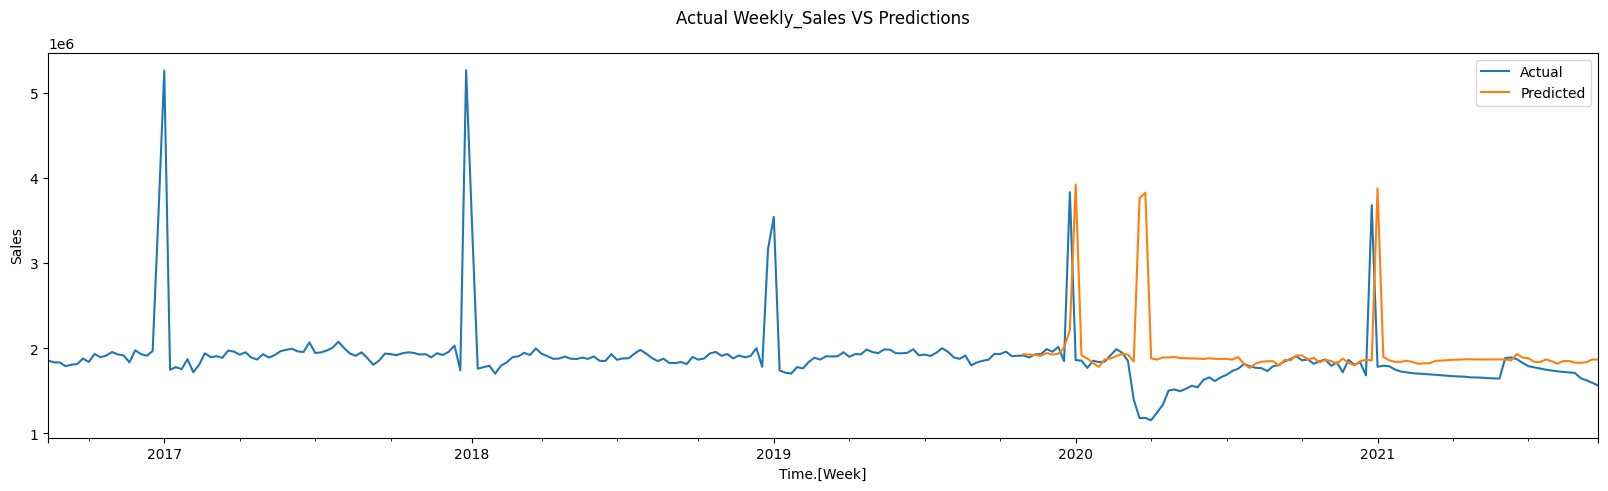

In [256]:
for i in grouped_data_gmm.Cluster.unique():
    data_gmm = grouped_data_gmm[grouped_data_gmm['Cluster'] == i]
    # print(data_gmm)
    all_train = data_gmm[data_gmm['Time.[Week]'] < '2019-11-01']
    all_test = data_gmm[data_gmm['Time.[Week]'] >= '2019-11-01']
    
    X_train = all_train.drop(['Time.[Week]','Sell Out Stat Fcst','Cluster'], axis = 1)
    X_test = all_test.drop(['Time.[Week]','Sell Out Stat Fcst','Cluster'], axis = 1)
    
    
    y_train = all_train['Sell Out Stat Fcst']
    y_test = all_test['Sell Out Stat Fcst']


    #Feature Scaling
    from sklearn.preprocessing import MinMaxScaler
    mms = MinMaxScaler()
    mms.fit(X_train)
    X_train_sc = mms.transform(X_train)
    X_test_sc = mms.transform(X_test)
    from sklearn.ensemble import RandomForestRegressor
    from sklearn import metrics
    from sklearn.metrics import  r2_score
    
        
    clf = RandomForestRegressor(n_estimators=100)
    clf.fit(X_train_sc, y_train)
    clf_pred = clf.predict(X_test_sc)
    

    print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, clf_pred))
    print('Root Mean Squared Error:', round(np.sqrt(metrics.mean_squared_error(y_test, clf_pred))))
    print('R2 Score:', r2_score(y_test, clf_pred))
    print('wape:',sum(np.abs(clf_pred- y_test))/sum(clf_pred))
    scorekeeper_gmm_clusterwise = scorekeeper_gmm_clusterwise.append({'Cluster' : i, 'Mean Absolute Error' :  metrics.mean_absolute_error(y_test, clf_pred) ,
                                                                      'Root Mean Squared Error' : round(np.sqrt(metrics.mean_squared_error(y_test, clf_pred))),
                                                                      'R2 Score' : r2_score(y_test, clf_pred),
                                                                      'wape': sum(np.abs(clf_pred- y_test))/sum(clf_pred)},
        ignore_index = True)
    rf_pr = pd.DataFrame({'Cluster': i,'Weekly_Sales':y_test.values, 'Weekly_Sales_rf_pred': clf_pred}, index = y_test.index)
    gmm_predictions = gmm_predictions.append(rf_pr)

gmm_predictions.index =pd.to_datetime(gmm_predictions.index)
gmm_predictions.reset_index(inplace =True)
grouped_data_gmm.index = pd.to_datetime(grouped_data_gmm.index)
grouped_data_gmm.drop(['Time.[Week]'], inplace= True, axis= 1)
grouped_data_gmm.reset_index(inplace= True)
df_gmm_final = pd.merge(grouped_data_gmm,gmm_predictions, on = ['Time.[Week]','Cluster'], how='outer')
df_gmm_final.fillna(0,inplace = True)
total_gmm_actual = df_gmm_final.groupby('Time.[Week]')['Sell Out Stat Fcst'].sum()
total_gmm_pred = df_gmm_final.groupby('Time.[Week]')['Weekly_Sales_rf_pred'].sum()
ax = total_gmm_actual.plot(figsize = (20,5), legend = True)
total_gmm_pred['2019-11-01':].plot(legend = True)
plt.legend(["Actual", "Predicted"])
plt.ylabel('Sales')
plt.title(f'Actual Weekly_Sales VS Predictions\n ')
plt.show()

pred = gmm_predictions.groupby(['Time.[Week]'])['Weekly_Sales_rf_pred'].sum()
act = gmm_predictions.groupby(['Time.[Week]'])['Weekly_Sales'].sum()
print('Mean Absolute Error:', metrics.mean_absolute_error(act, pred))
print('Root Mean Squared Error:', round(np.sqrt(metrics.mean_squared_error(act, pred))))
print('R2 Score:', r2_score(act, pred))
print('wape:',sum(np.abs(pred- act))/sum(pred))
print(metrics.mean_absolute_percentage_error(act,pred))

Mean Absolute Error: 261439.61371134332
Root Mean Squared Error: 564949
R2 Score: -1.943917665365463
wape: 0.13398271740363976
0.1607079689320174


In [267]:
grouped_data_gmm

,Time.[Week],Cluster,Sell Out Stat Fcst,lag1,lag2,ROC
0,2016-08-14,0,8.180000e+03,6.949000e+03,6.900000e+03,0.705137
1,2016-08-14,1,2.458000e+03,2.417000e+03,2.211000e+03,8.522962
2,2016-08-14,2,1.900000e+01,7.000000e+00,6.000000e+00,14.285714
3,2016-08-14,3,1.793659e+06,1.817407e+06,1.624832e+06,10.596141
4,2016-08-14,4,1.476000e+03,2.281000e+03,4.060000e+02,82.200789
...,...,...,...,...,...,...
2675,2021-09-26,5,1.149961e+03,1.150134e+03,1.183893e+03,-2.935243
2676,2021-09-26,6,3.507310e+02,3.904939e+02,4.392356e+02,-12.482078
2677,2021-09-26,7,2.925384e+02,3.121418e+02,3.403680e+02,-9.042743
2678,2021-09-26,8,1.773931e+04,1.821443e+04,1.868426e+04,-2.579432


In [277]:
data_gmm = grouped_data_gmm

In [278]:
data_gmm

,Time.[Week],Cluster,Sell Out Stat Fcst,lag1,lag2,ROC
0,2016-08-14,0,8.180000e+03,6.949000e+03,6.900000e+03,0.705137
1,2016-08-14,1,2.458000e+03,2.417000e+03,2.211000e+03,8.522962
2,2016-08-14,2,1.900000e+01,7.000000e+00,6.000000e+00,14.285714
3,2016-08-14,3,1.793659e+06,1.817407e+06,1.624832e+06,10.596141
4,2016-08-14,4,1.476000e+03,2.281000e+03,4.060000e+02,82.200789
...,...,...,...,...,...,...
2675,2021-09-26,5,1.149961e+03,1.150134e+03,1.183893e+03,-2.935243
2676,2021-09-26,6,3.507310e+02,3.904939e+02,4.392356e+02,-12.482078
2677,2021-09-26,7,2.925384e+02,3.121418e+02,3.403680e+02,-9.042743
2678,2021-09-26,8,1.773931e+04,1.821443e+04,1.868426e+04,-2.579432


In [283]:

# print(data_gmm)
all_train = data_gmm[data_gmm['Time.[Week]'] < '2019-11-01']
all_test = data_gmm[data_gmm['Time.[Week]'] >= '2019-11-01']

X_train = all_train.drop(['Time.[Week]','Sell Out Stat Fcst'], axis = 1)
X_test = all_test.drop(['Time.[Week]','Sell Out Stat Fcst'], axis = 1)


y_train = all_train['Sell Out Stat Fcst']
y_test = all_test['Sell Out Stat Fcst']


#Feature Scaling
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()
mms.fit(X_train)
X_train_sc = mms.transform(X_train)
X_test_sc = mms.transform(X_test)
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
from sklearn.metrics import  r2_score

    
clf = RandomForestRegressor(n_estimators=100)
clf.fit(X_train_sc, y_train)
clf_pred = clf.predict(X_test_sc)


print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, clf_pred))
print('Root Mean Squared Error:', round(np.sqrt(metrics.mean_squared_error(y_test, clf_pred))))
print('R2 Score:', r2_score(y_test, clf_pred))
print('wape:',sum(np.abs(clf_pred- y_test))/sum(clf_pred))

print(metrics.mean_absolute_percentage_error(y_test,clf_pred))

Mean Absolute Error: 26306.71423630304
Root Mean Squared Error: 163995
R2 Score: 0.902588600072391
wape: 0.13542687468817377
4.434213631748011


In [258]:
df_gmm_metric = pd.merge(grouped_data_gmm,gmm_predictions, on = ['Time.[Week]','Cluster'], how='outer')
df_gmm_metric.drop

,Time.[Week],Cluster,Sell Out Stat Fcst,lag1,lag2,ROC,Weekly_Sales,Weekly_Sales_rf_pred
0,2016-08-14,0,8.180000e+03,6.949000e+03,6.900000e+03,0.705137,NaN,NaN
1,2016-08-14,1,2.458000e+03,2.417000e+03,2.211000e+03,8.522962,NaN,NaN
2,2016-08-14,2,1.900000e+01,7.000000e+00,6.000000e+00,14.285714,NaN,NaN
3,2016-08-14,3,1.793659e+06,1.817407e+06,1.624832e+06,10.596141,NaN,NaN
4,2016-08-14,4,1.476000e+03,2.281000e+03,4.060000e+02,82.200789,NaN,NaN
...,...,...,...,...,...,...,...,...
2675,2021-09-26,5,1.149961e+03,1.150134e+03,1.183893e+03,-2.935243,1149.961364,1300.04
2676,2021-09-26,6,3.507310e+02,3.904939e+02,4.392356e+02,-12.482078,350.730990,1176.20
2677,2021-09-26,7,2.925384e+02,3.121418e+02,3.403680e+02,-9.042743,292.538381,1187.28
2678,2021-09-26,8,1.773931e+04,1.821443e+04,1.868426e+04,-2.579432,17739.311861,57050.72


In [169]:
gmm_predictions

,Time.[Week],Cluster,Weekly_Sales,Weekly_Sales_rf_pred
0,2019-11-03,0,1.844766e+06,1853594.24
1,2019-11-10,0,1.824999e+06,1873369.07
2,2019-11-17,0,1.861646e+06,1864822.88
3,2019-11-24,0,1.857681e+06,1848272.07
4,2019-12-01,0,1.922164e+06,1854815.08
...,...,...,...,...
995,2021-08-29,9,2.056570e+04,34563.01
996,2021-09-05,9,1.923167e+04,34553.43
997,2021-09-12,9,1.868426e+04,60296.60
998,2021-09-19,9,1.821443e+04,60187.84


In [170]:
# gmm_predictions.drop(['Time.[Week]'], axis = 1,inplace =True)
# gmm_predictions

In [174]:
grouped_data_gmm

,Time.[Week],Cluster,Sell Out Stat Fcst,lag1,lag2,ROC
0,2016-08-14,0,1.793155e+06,1.823879e+06,1.631307e+06,10.558376
1,2016-08-14,1,1.900000e+01,7.000000e+00,6.000000e+00,14.285714
2,2016-08-14,2,1.353000e+03,1.518000e+03,1.241000e+03,18.247694
3,2016-08-14,3,2.318100e+04,3.613900e+04,3.249900e+04,10.072221
4,2016-08-14,4,1.476000e+03,2.281000e+03,4.060000e+02,82.200789
...,...,...,...,...,...,...
2675,2021-09-26,5,7.471031e+03,7.745662e+03,8.183500e+03,-5.652691
2676,2021-09-26,6,3.764760e+01,2.463663e+01,4.449017e+01,-80.585468
2677,2021-09-26,7,2.925384e+02,3.121418e+02,3.403680e+02,-9.042743
2678,2021-09-26,8,3.507310e+02,3.904939e+02,4.392356e+02,-12.482078


In [175]:
gmm_predictions

,Time.[Week],Cluster,Weekly_Sales,Weekly_Sales_rf_pred
0,2019-11-03,0,1.844766e+06,1853594.24
1,2019-11-10,0,1.824999e+06,1873369.07
2,2019-11-17,0,1.861646e+06,1864822.88
3,2019-11-24,0,1.857681e+06,1848272.07
4,2019-12-01,0,1.922164e+06,1854815.08
...,...,...,...,...
995,2021-08-29,9,2.056570e+04,34563.01
996,2021-09-05,9,1.923167e+04,34553.43
997,2021-09-12,9,1.868426e+04,60296.60
998,2021-09-19,9,1.821443e+04,60187.84


,Time.[Week],Cluster,Sell Out Stat Fcst,lag1,lag2,ROC,Weekly_Sales,Weekly_Sales_rf_pred
0,2016-08-14,0,1.842976e+06,1.887337e+06,1.688363e+06,10.542579,NaN,NaN
1,2016-08-14,1,1.900000e+01,7.000000e+00,6.000000e+00,14.285714,NaN,NaN
2,2016-08-14,2,1.476000e+03,2.281000e+03,4.060000e+02,82.200789,NaN,NaN
3,2016-08-14,3,3.300000e+01,4.800000e+01,3.200000e+01,33.333333,NaN,NaN
4,2016-08-14,4,1.031500e+04,1.690000e+03,1.478000e+03,12.544379,NaN,NaN
...,...,...,...,...,...,...,...,...
2675,2021-09-26,5,1.149961e+03,1.150134e+03,1.183893e+03,-2.935243,1149.961364,1266.4400
2676,2021-09-26,6,3.507310e+02,3.904939e+02,4.392356e+02,-12.482078,350.730990,1170.1200
2677,2021-09-26,7,3.051701e+01,3.083627e+01,5.327679e+01,-72.773140,30.517010,47.2600
2678,2021-09-26,8,3.088908e+01,2.610233e+01,4.637772e+01,-77.676537,30.889080,29.6940


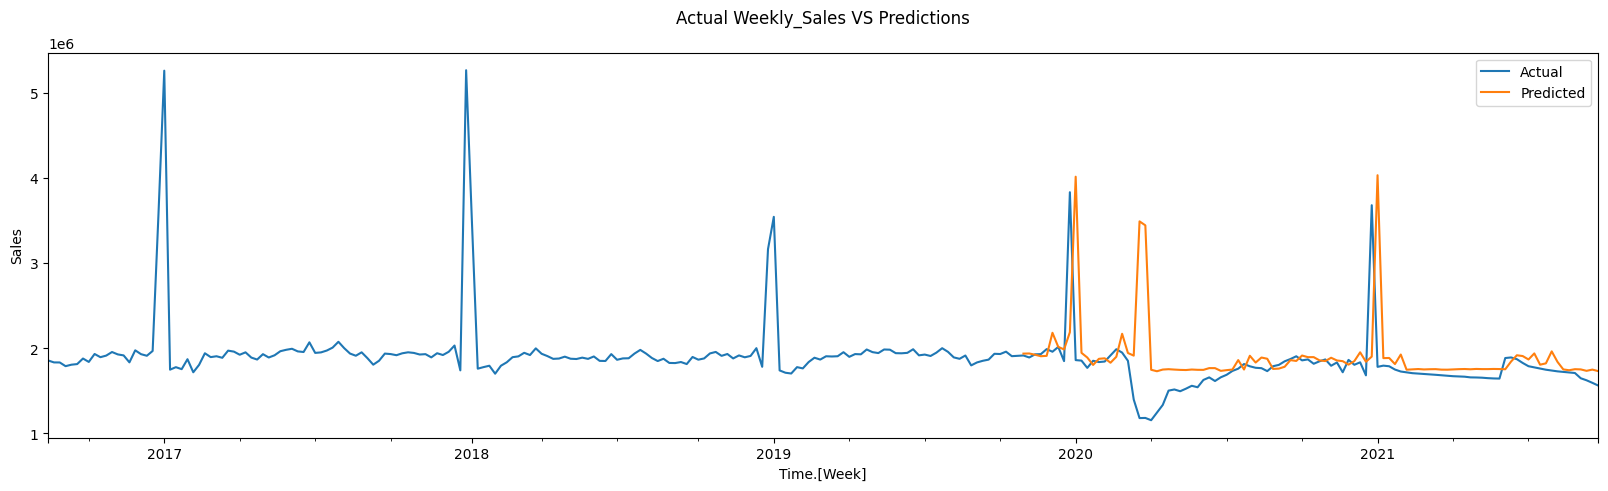

In [ ]:
scorekeeper_gmm_clusterwise

,Cluster,Mean Absolute Error,Root Mean Squared Error,R2 Score,wape
0,0.0,5.209412,7.0,0.604478,0.30087
1,1.0,6.953193,11.0,0.299385,0.456743
2,2.0,173972.895022,457298.0,-1.753059,0.110043
3,3.0,465.409617,826.0,-0.134779,2.017908
4,4.0,2017.047313,2749.0,-0.365717,0.725686
5,5.0,44.682305,55.0,-1.076202,0.468835
6,6.0,13.104099,18.0,0.140707,0.420284
7,7.0,10.525176,13.0,0.272667,0.437839
8,8.0,6936.257263,9981.0,0.259989,0.310075
9,9.0,49041.184758,89840.0,-0.920478,0.166482


In [ ]:
for i in clusters_df['Cluster'].unique():
    data_123 = grouped_data_gmm[grouped_data_gmm['Cluster'] == i]
    grouped_data_gmm[grouped_data_gmm['Cluster'] == i]['lag_1'] = data_123['Sell Out Stat Fcst'].shift(1)
    print(grouped_data_gmm)
    

            Time.[Week] Time.[Week].1  Cluster  Sell Out Stat Fcst  \
Time.[Week]                                                          
2016-07-31   2016-07-31    2016-07-31        0        1.568561e+06   
2016-07-31   2016-07-31    2016-07-31        1        6.000000e+00   
2016-07-31   2016-07-31    2016-07-31        2        2.670000e+03   
2016-07-31   2016-07-31    2016-07-31        3        7.780400e+04   
2016-07-31   2016-07-31    2016-07-31        4        4.116900e+04   
...                 ...           ...      ...                 ...   
2021-09-26   2021-09-26    2021-09-26        5        7.471031e+03   
2021-09-26   2021-09-26    2021-09-26        6        3.764760e+01   
2021-09-26   2021-09-26    2021-09-26        7        6.801474e+02   
2021-09-26   2021-09-26    2021-09-26        8        4.072223e+01   
2021-09-26   2021-09-26    2021-09-26        9        1.149961e+03   

                   lag_1  
Time.[Week]               
2016-07-31           NaN  
2016-07-

C:\Users\Mayrip\AppData\Local\Temp\ipykernel_12280\3555944385.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  grouped_data_gmm[grouped_data_gmm['Cluster'] == i]['lag_1'] = data_123['Sell Out Stat Fcst'].shift(1)
C:\Users\Mayrip\AppData\Local\Temp\ipykernel_12280\3555944385.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  grouped_data_gmm[grouped_data_gmm['Cluster'] == i]['lag_1'] = data_123['Sell Out Stat Fcst'].shift(1)
C:\Users\Mayrip\AppData\Local\Temp\ipykernel_12280\3555944385.py:3: SettingWithC

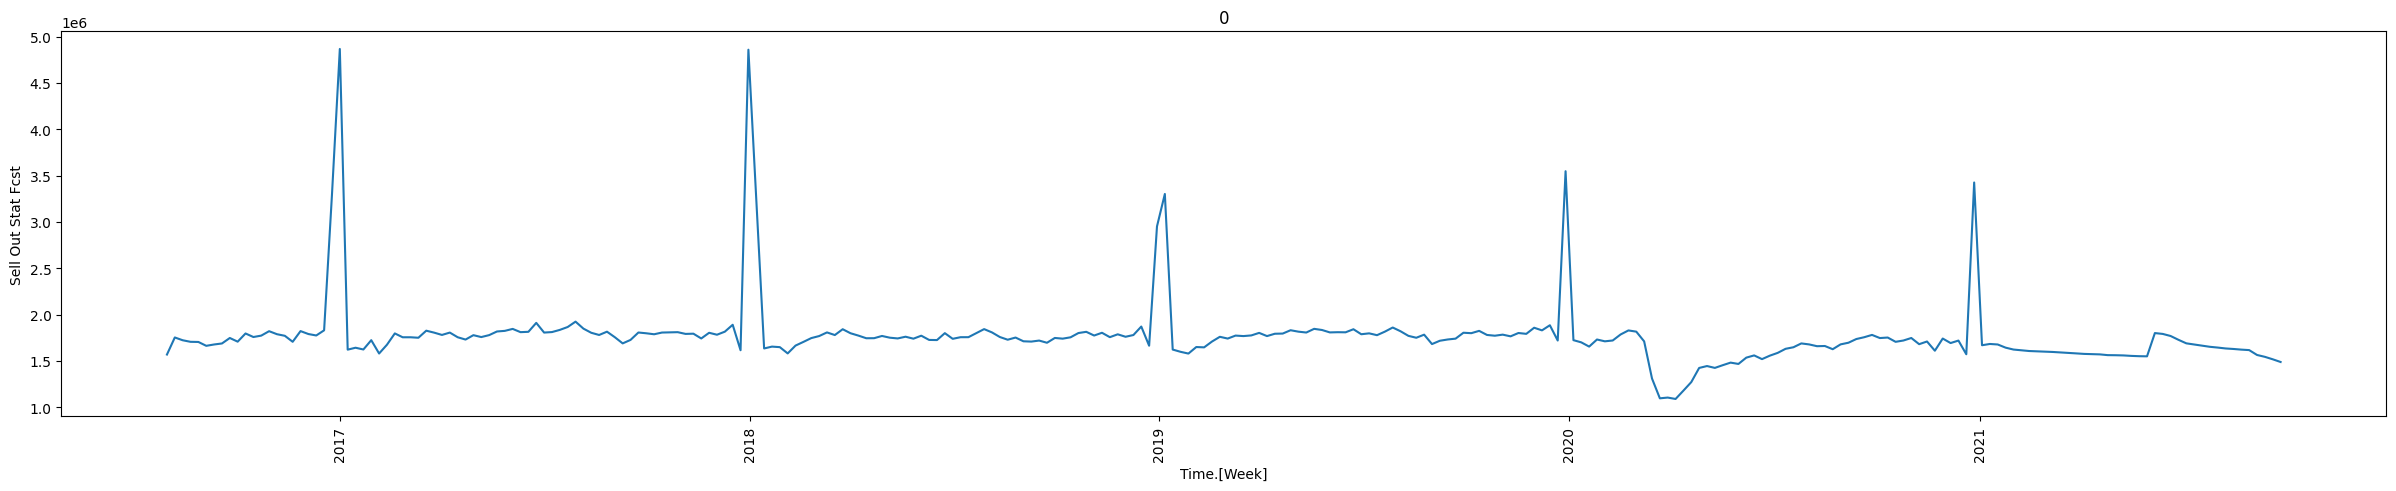

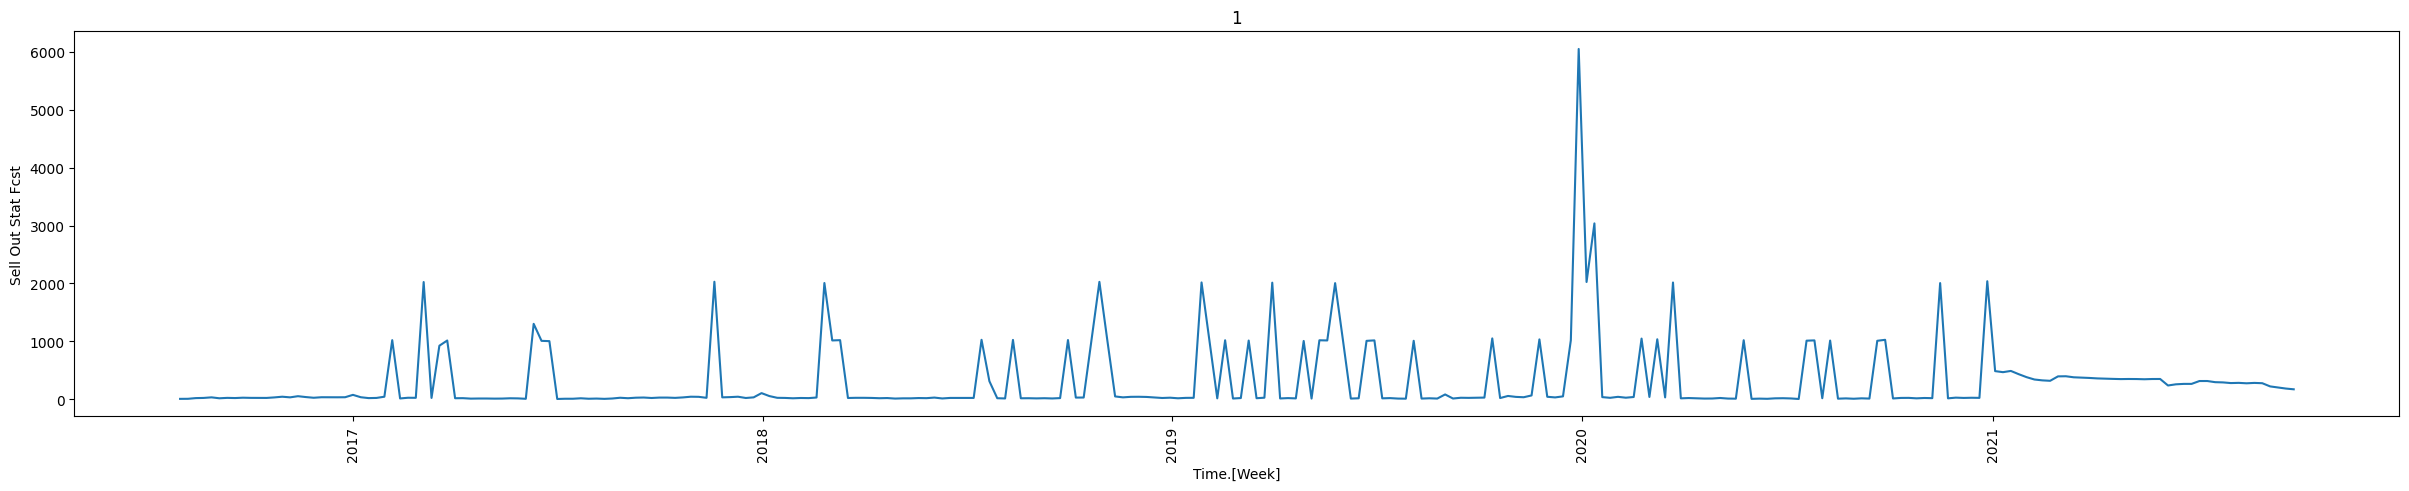

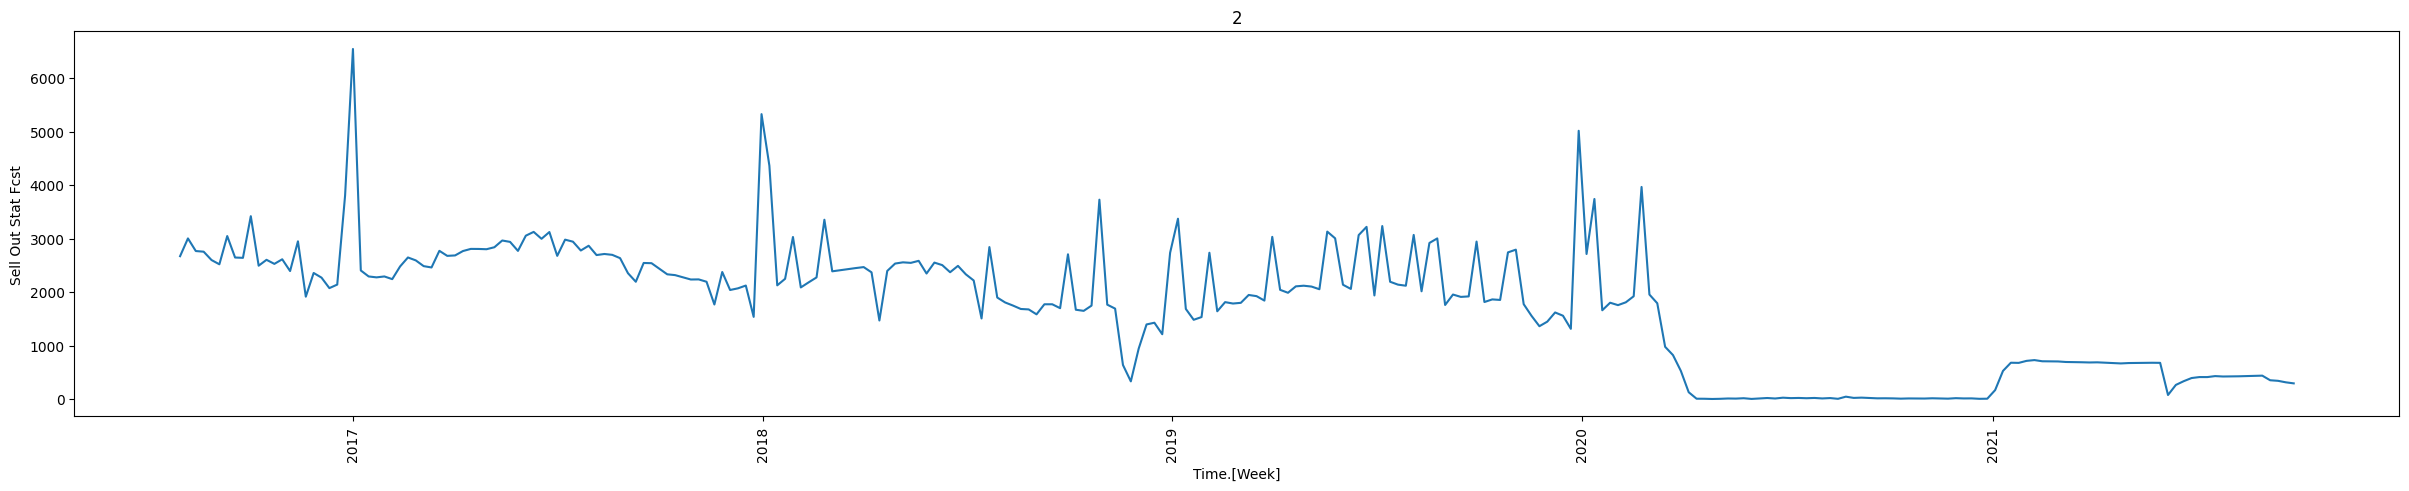

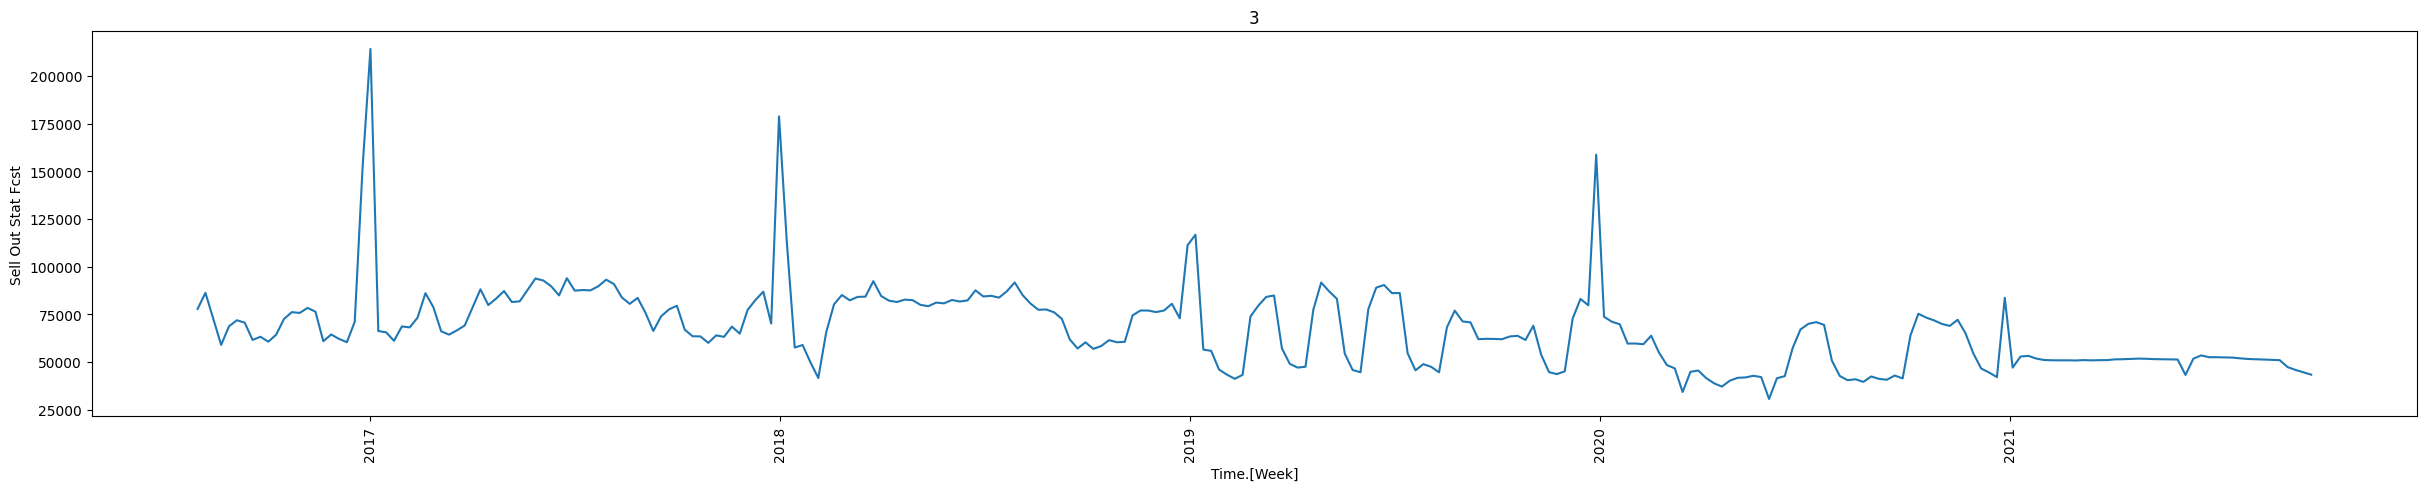

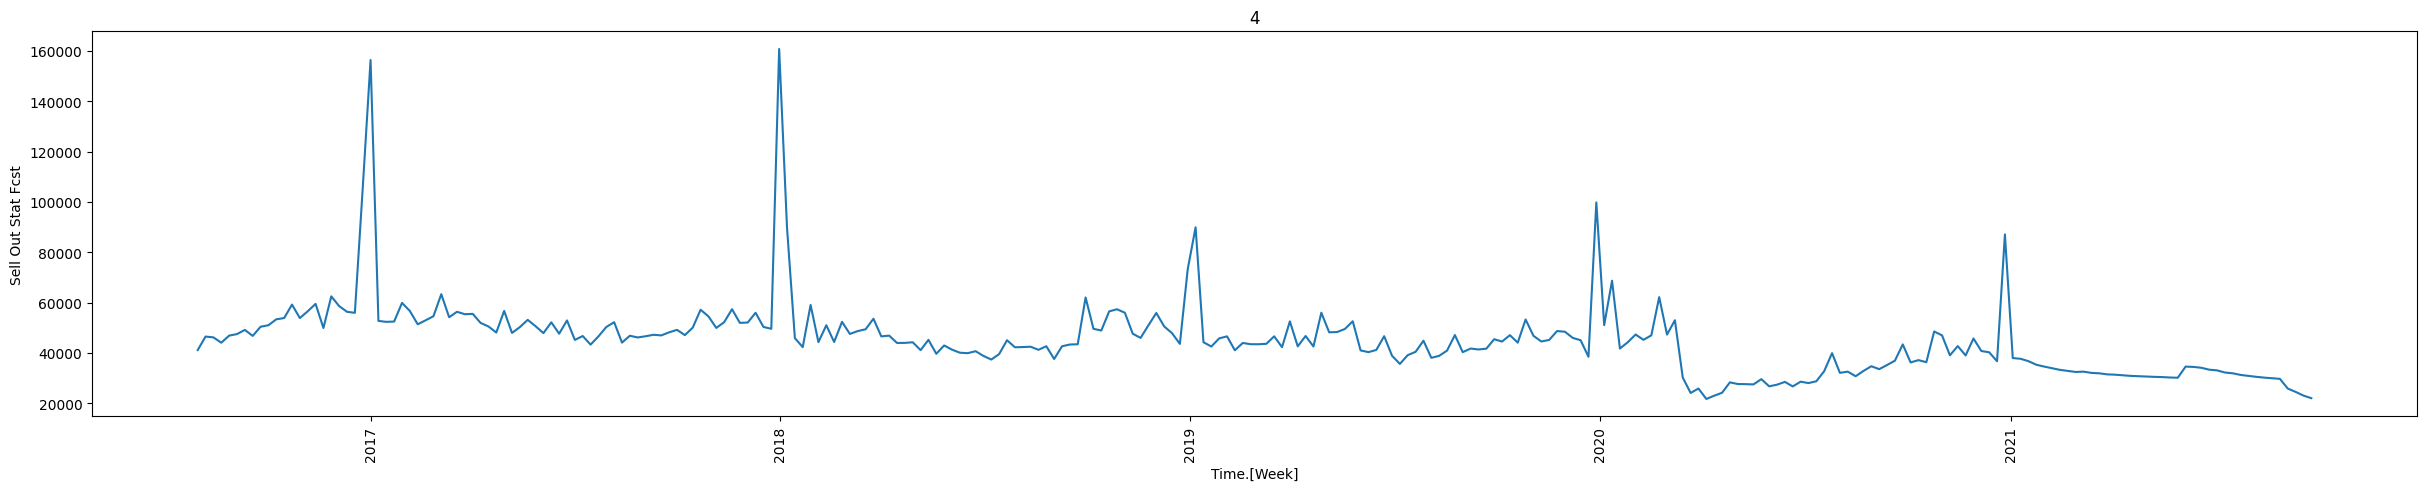

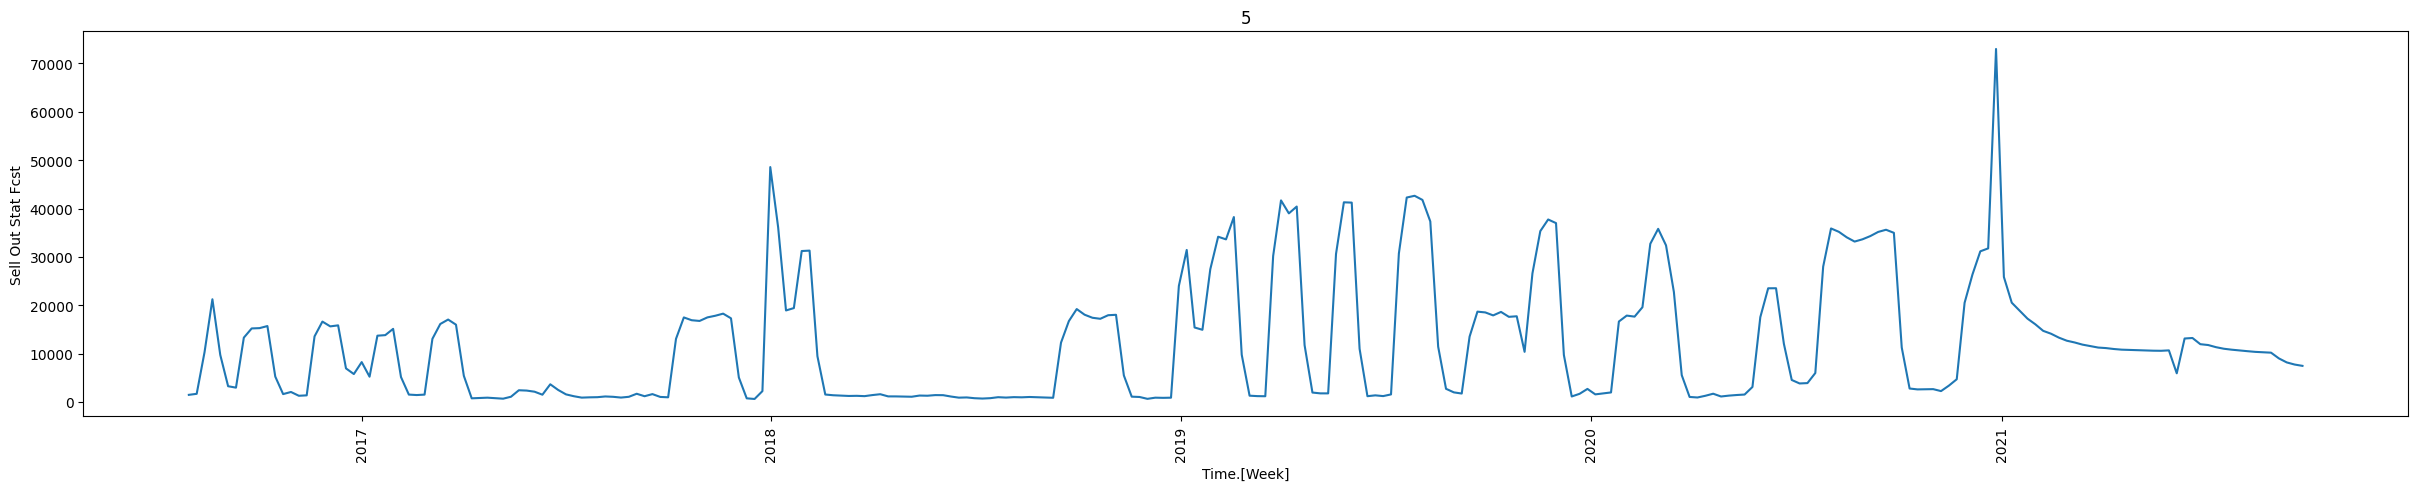

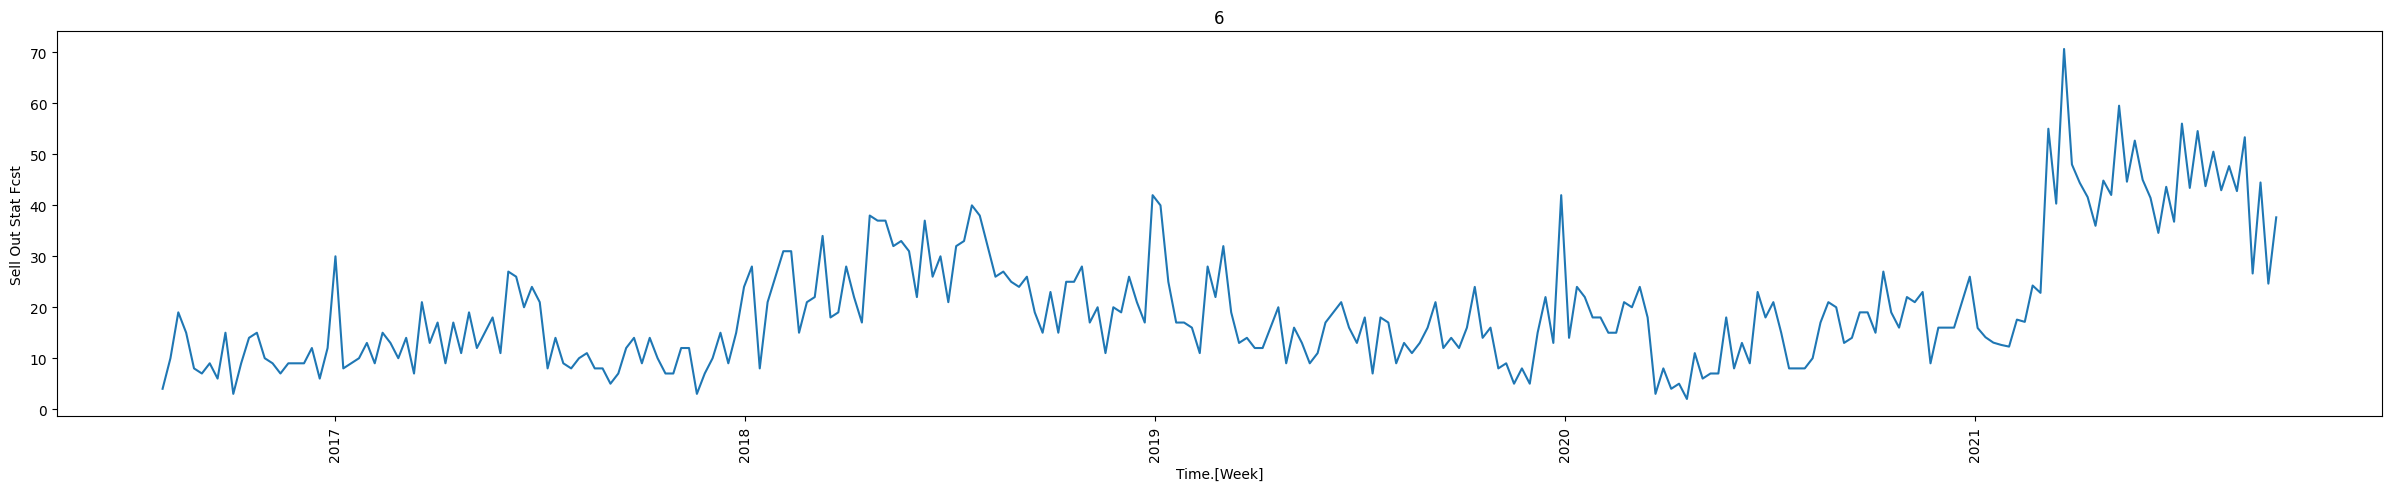

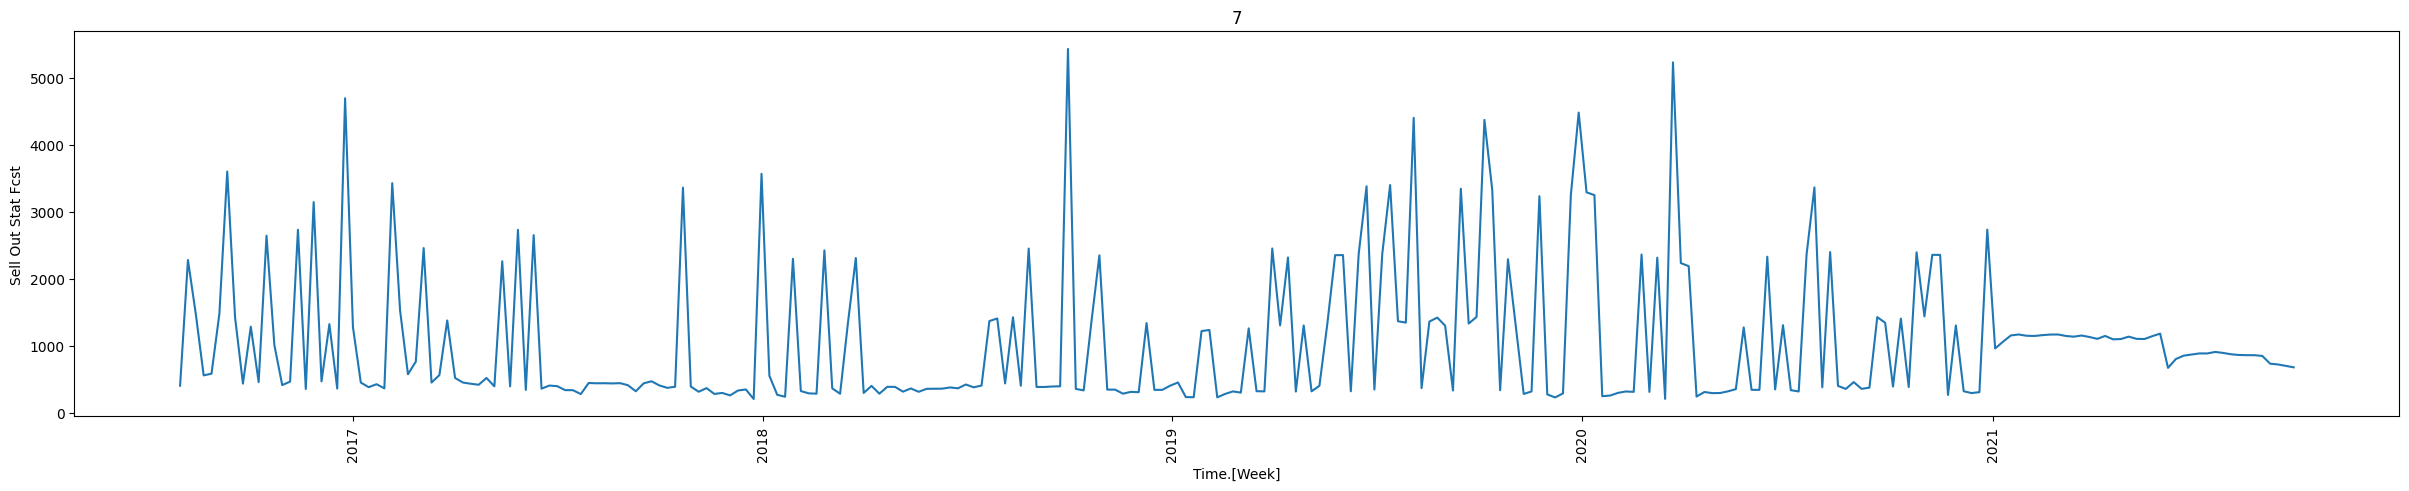

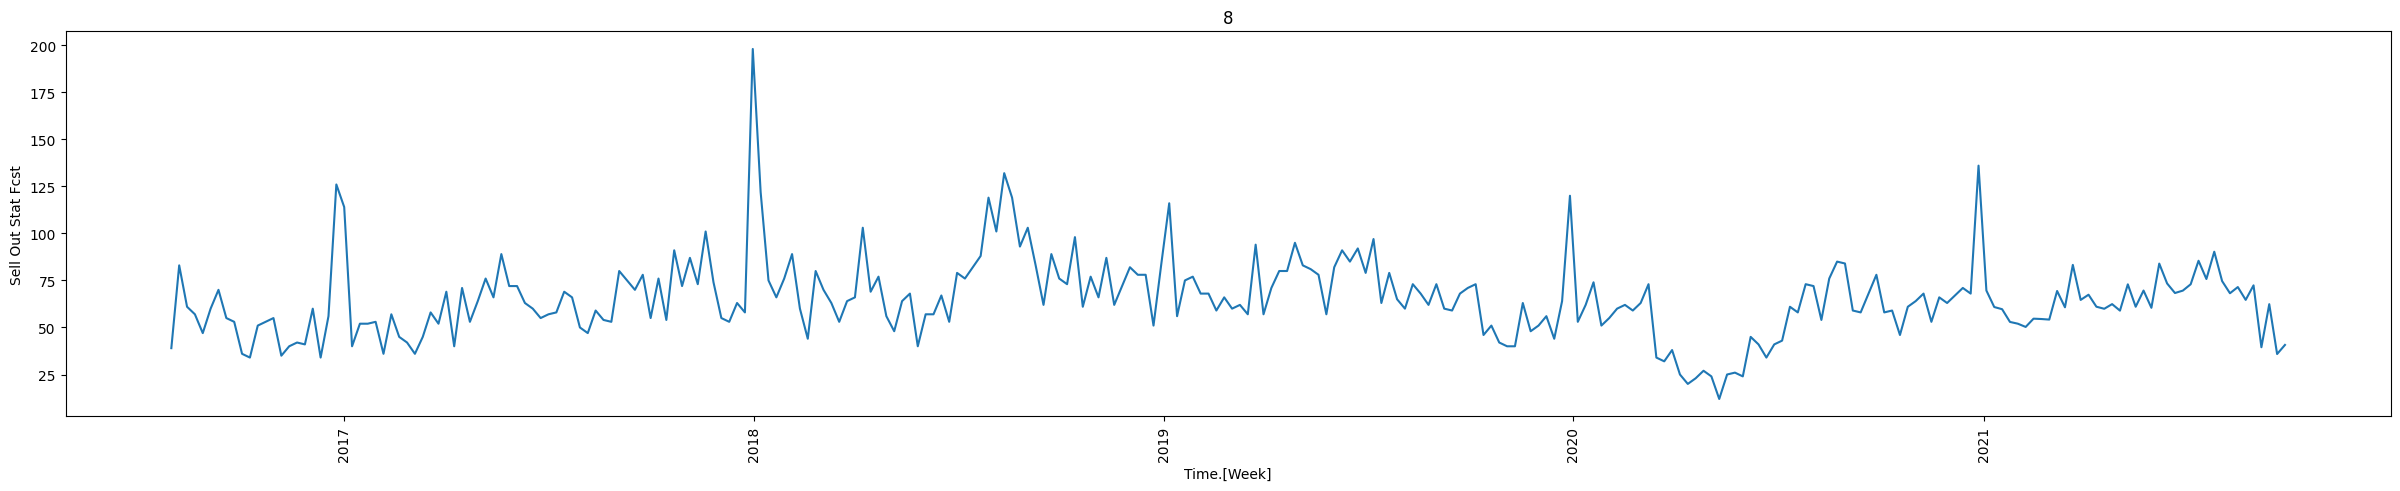

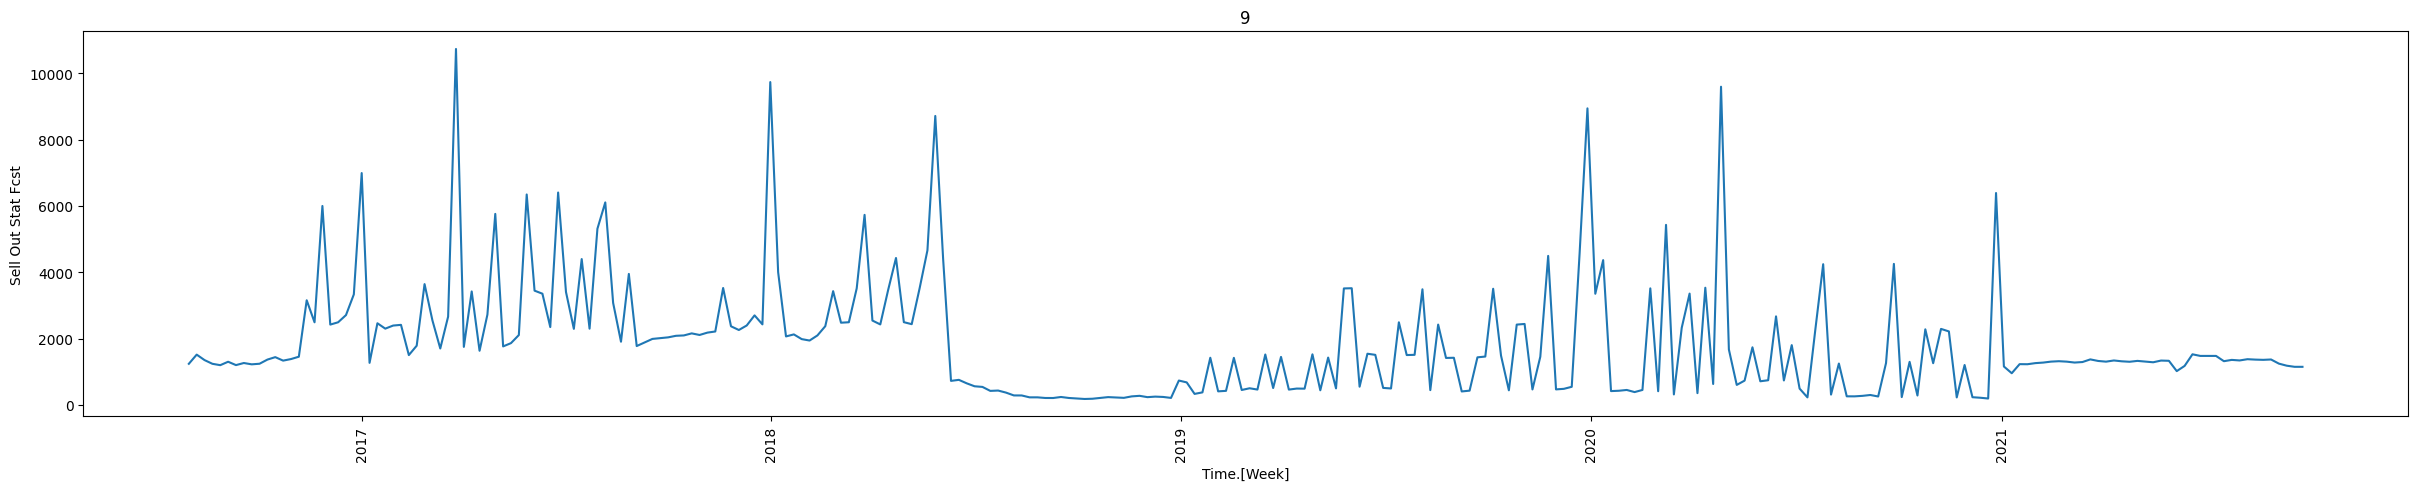

In [ ]:
for i in clusters_df['Cluster'].unique():
    data_123 = grouped_data_gmm[grouped_data_gmm['Cluster'] == i]
    plt.figure(figsize=(30,5))
    sns.lineplot(data = data_123,
                                    x = 'Time.[Week]', y = 'Sell Out Stat Fcst').set_title(i)
      
    plt.xticks(rotation=90)
    print("\n")
    plt.show()

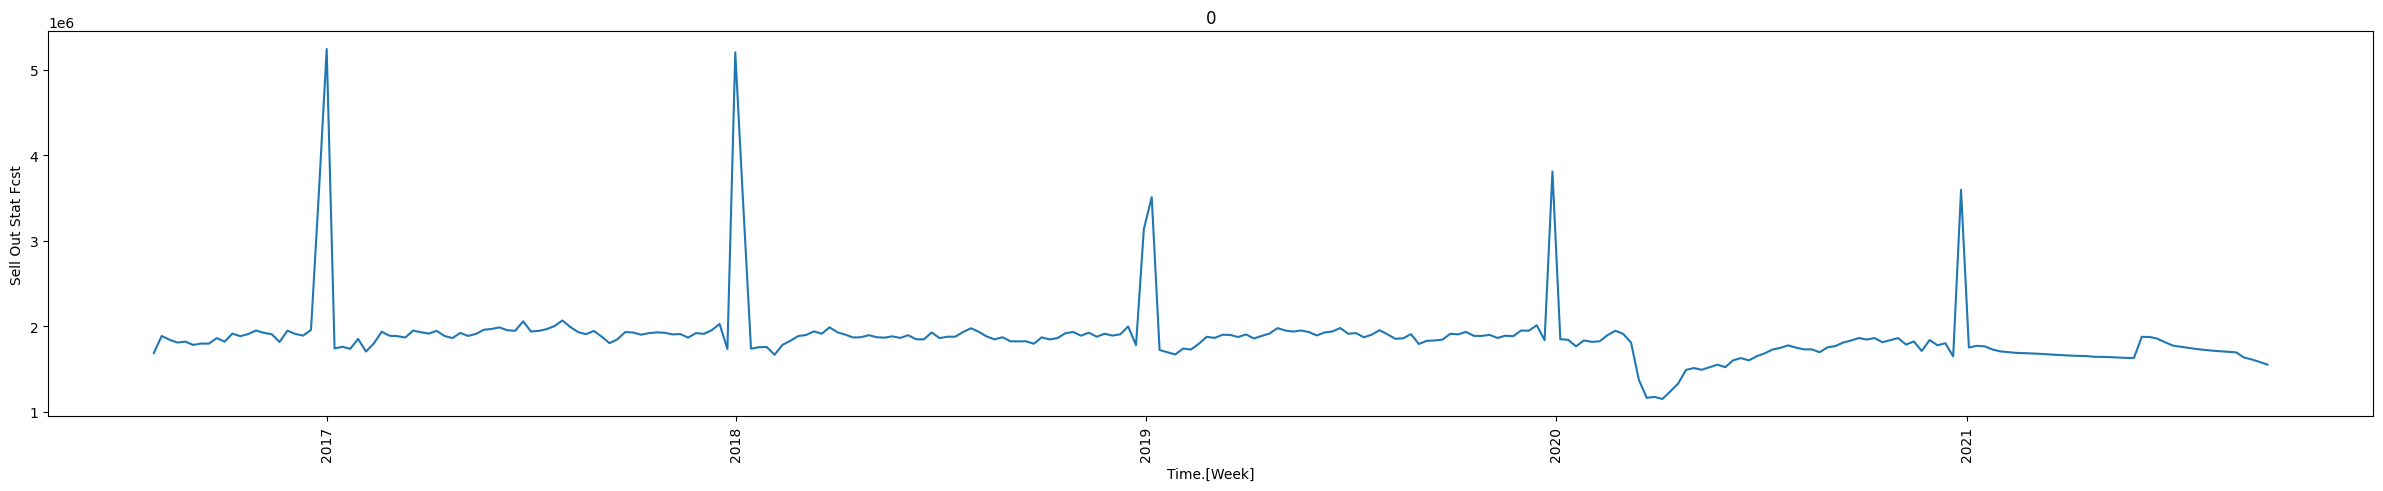

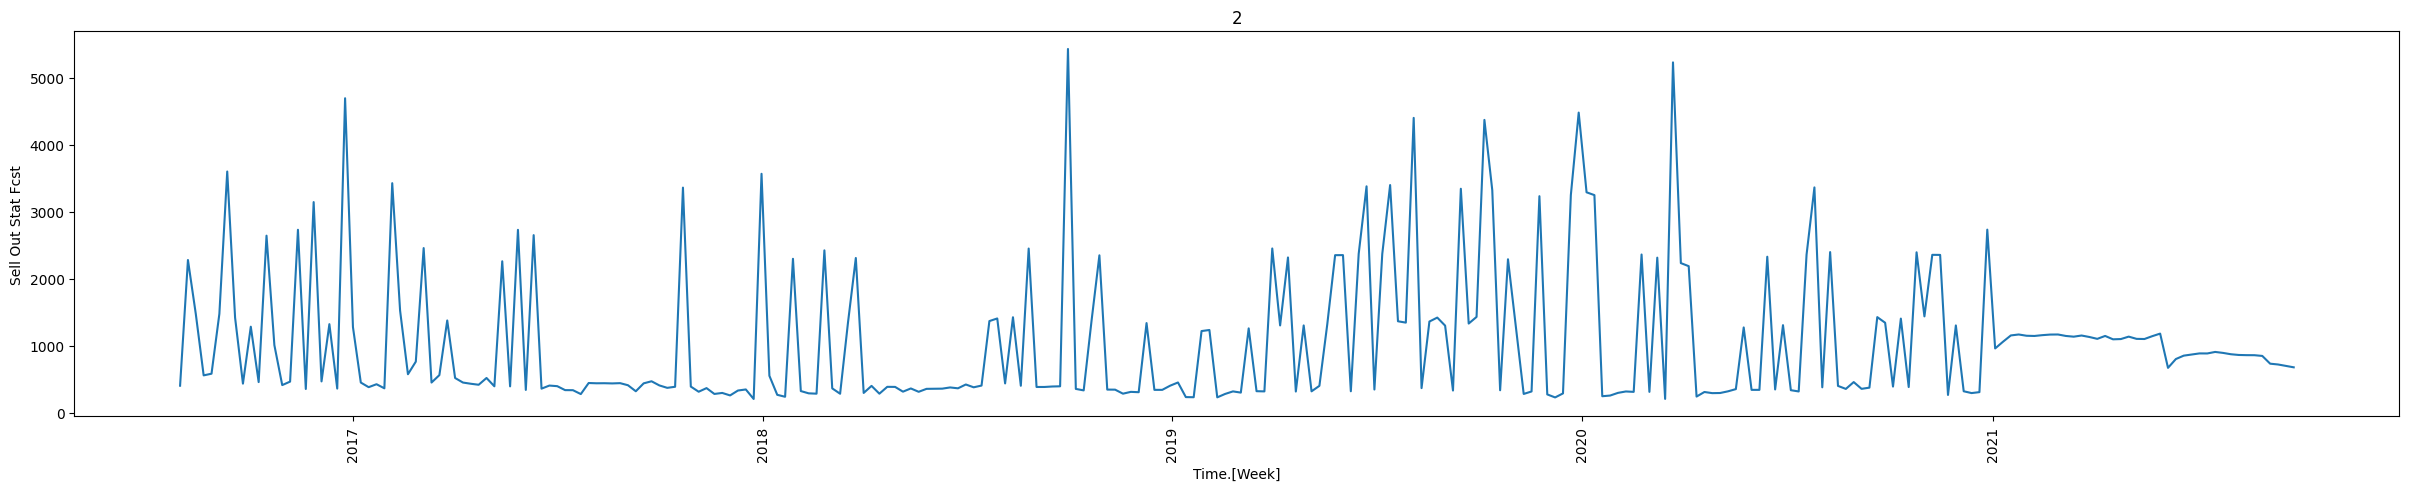

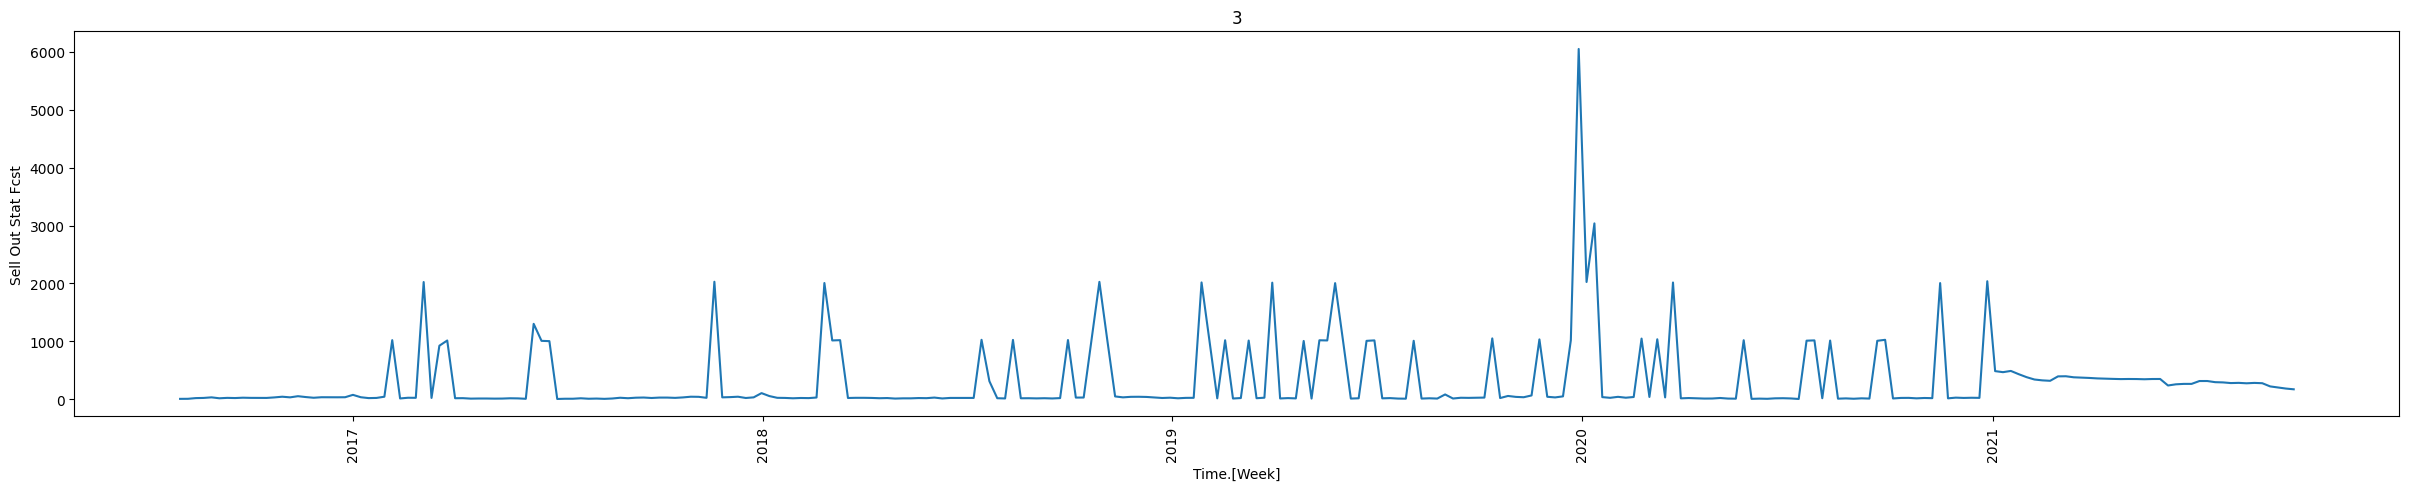

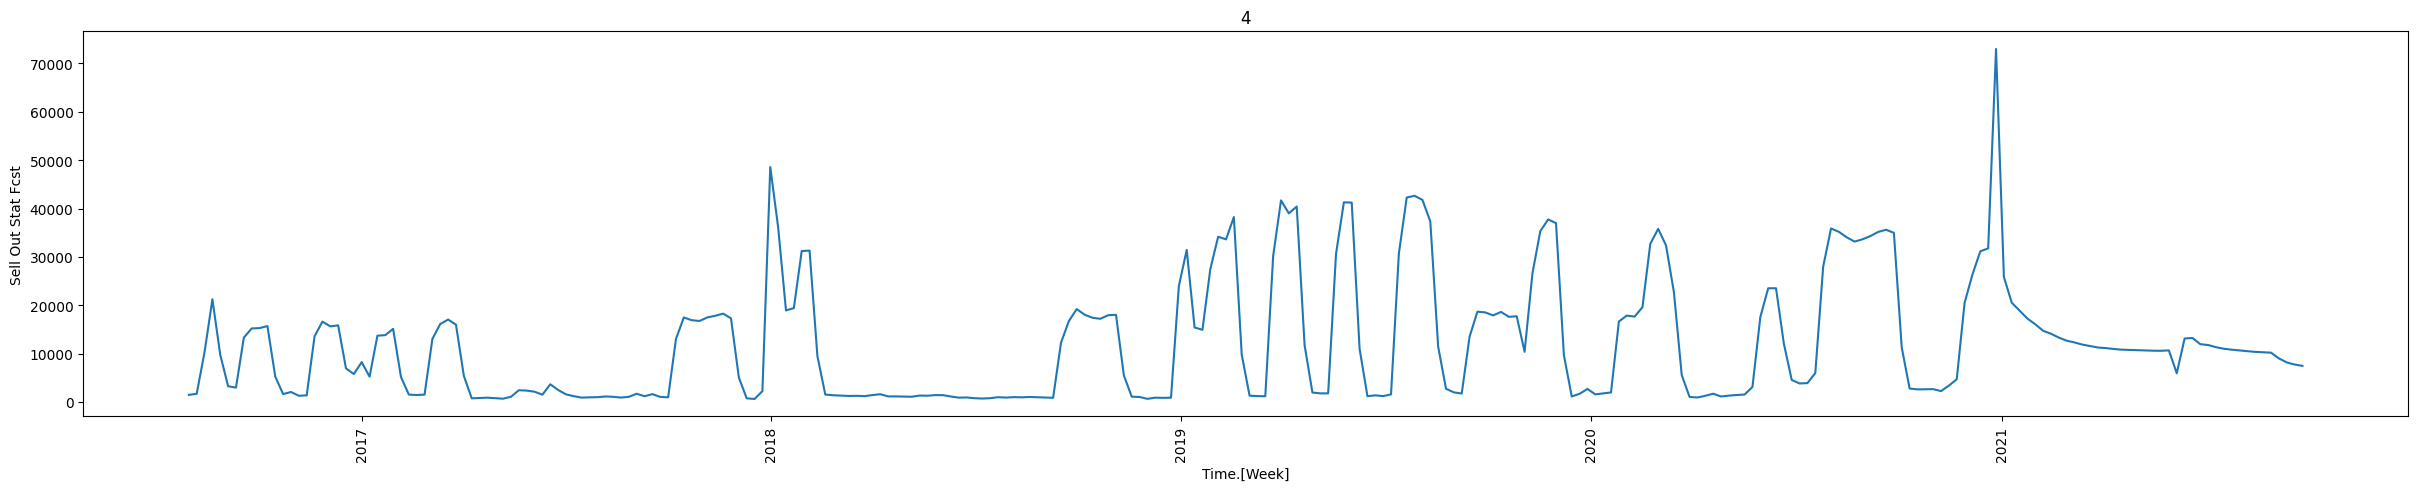

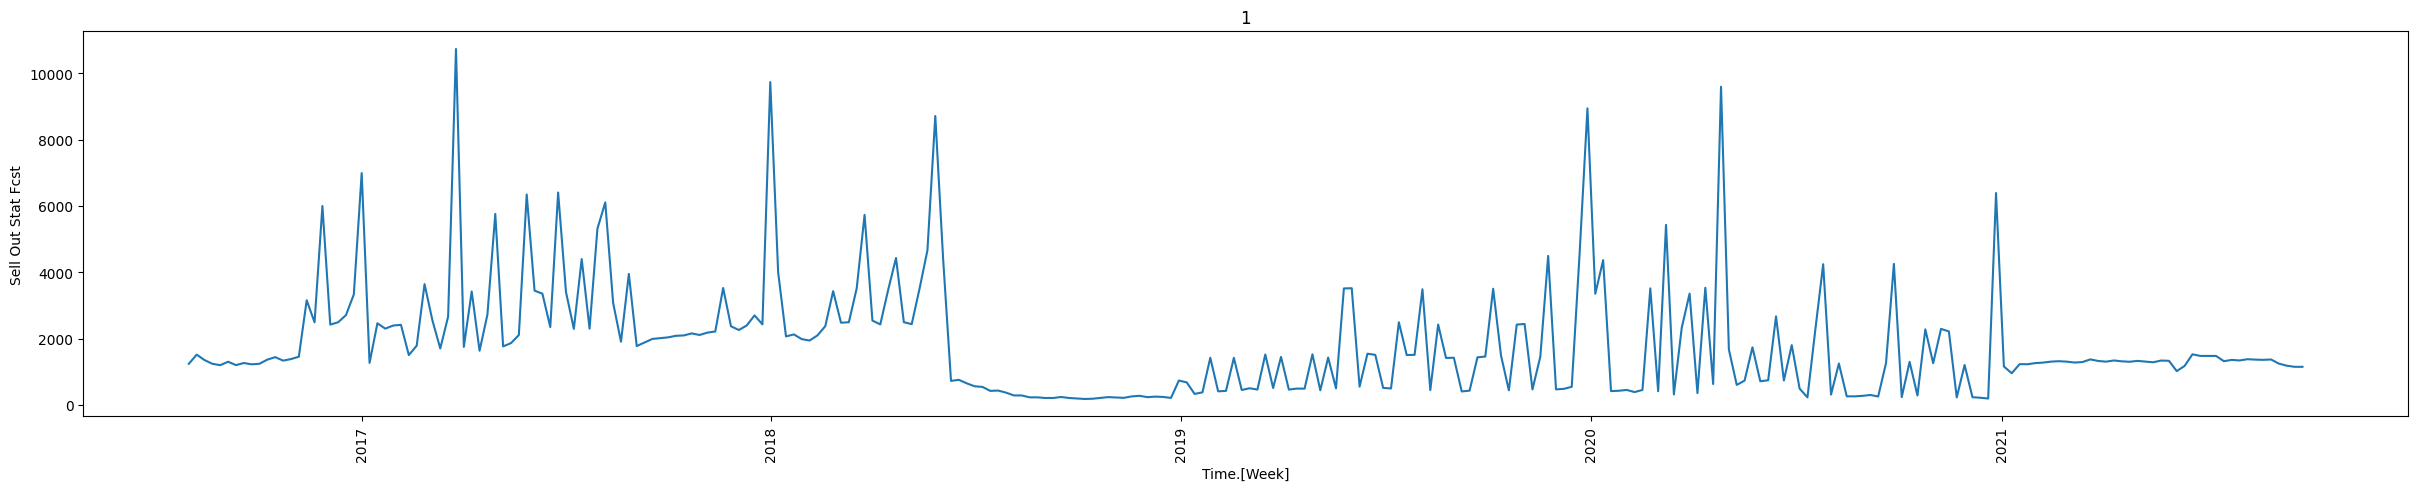

In [ ]:
for i in clusters_df_agglom['Cluster'].unique():
    data_123 = grouped_data_hir[grouped_data_hir['Cluster'] == i]
    plt.figure(figsize=(30,5))
    sns.lineplot(data = data_123,
                                    x = 'Time.[Week]', y = 'Sell Out Stat Fcst').set_title(i)
      
    plt.xticks(rotation=90)
    print("\n")
    plt.show()

C:\Users\Mayrip\AppData\Local\Temp\ipykernel_7824\3805797438.py:7: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data = lol2,


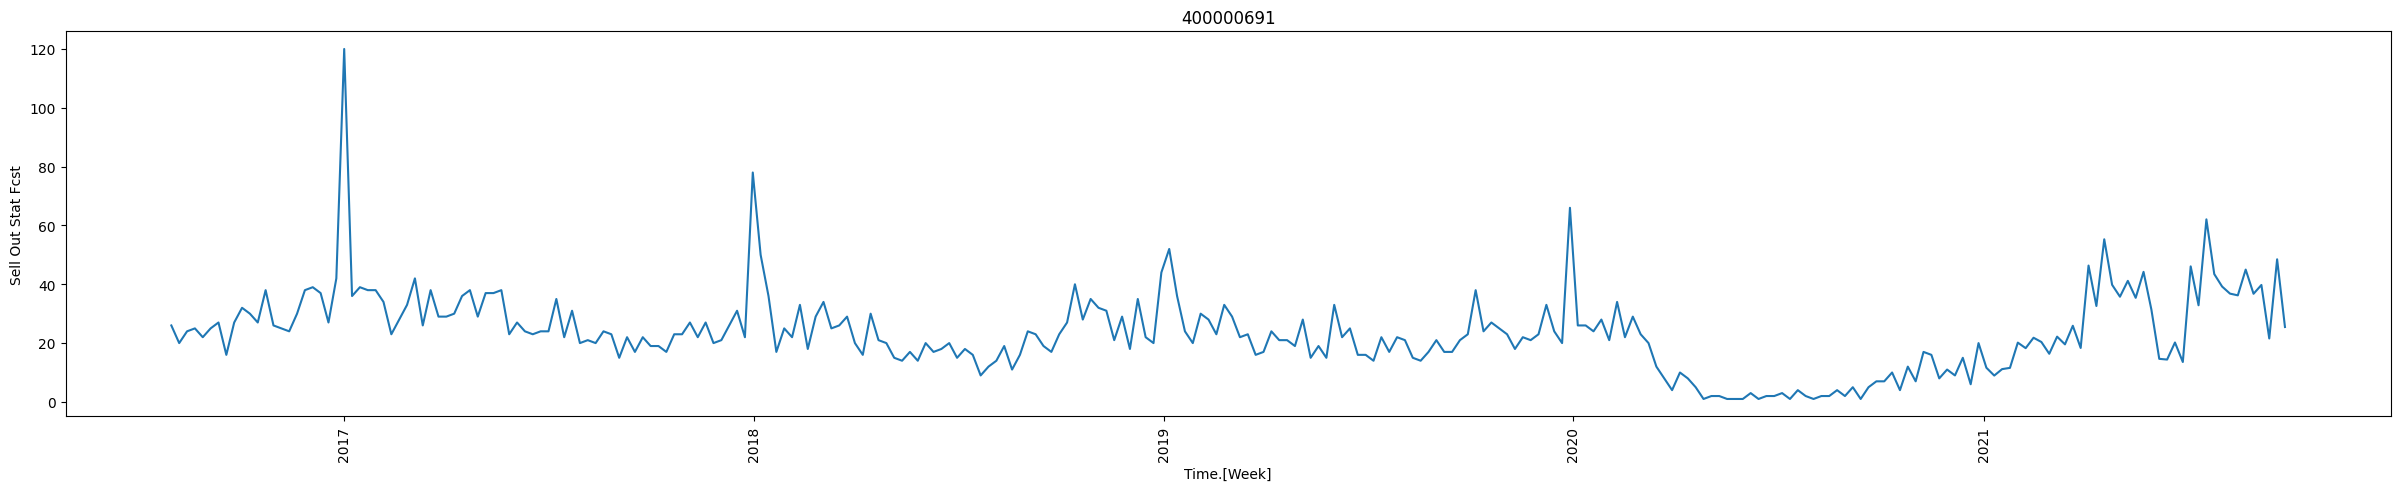

In [ ]:
sales_domain = list(clusters_df[clusters_df['Cluster'] == 35].Companies)

for i in sales_domain:
      lol2 = df_new_item[df_new_item['Item.[Planning Item]']==i]

      plt.figure(figsize=(30,5))
      sns.lineplot(data = lol2,
                                    x = 'Time.[Week]', y = 'Sell Out Stat Fcst',
                                    estimator = np.sum,ci=None
                                    ).set_title(i)
      
      plt.xticks(rotation=90)
      print("\n")
      plt.show()

In [ ]:
clusters_df.describe()

,Cluster,Companies
count,341.000000,3.410000e+02
mean,33.785924,4.000020e+08
std,29.998499,1.750637e+03
min,0.000000,4.000000e+08
25%,12.000000,4.000005e+08
50%,12.000000,4.000014e+08
75%,51.000000,4.000040e+08
max,98.000000,4.000059e+08


[Text(0, 0, '0'),
 Text(1, 0, '1'),
 Text(2, 0, '2'),
 Text(3, 0, '3'),
 Text(4, 0, '4'),
 Text(5, 0, '5'),
 Text(6, 0, '6'),
 Text(7, 0, '7'),
 Text(8, 0, '8'),
 Text(9, 0, '9'),
 Text(10, 0, '10'),
 Text(11, 0, '11'),
 Text(12, 0, '12'),
 Text(13, 0, '13'),
 Text(14, 0, '14'),
 Text(15, 0, '15'),
 Text(16, 0, '16'),
 Text(17, 0, '17'),
 Text(18, 0, '18'),
 Text(19, 0, '19'),
 Text(20, 0, '20'),
 Text(21, 0, '21'),
 Text(22, 0, '22'),
 Text(23, 0, '23'),
 Text(24, 0, '24'),
 Text(25, 0, '25'),
 Text(26, 0, '26'),
 Text(27, 0, '27'),
 Text(28, 0, '28'),
 Text(29, 0, '29'),
 Text(30, 0, '30'),
 Text(31, 0, '31'),
 Text(32, 0, '32'),
 Text(33, 0, '33'),
 Text(34, 0, '34'),
 Text(35, 0, '35'),
 Text(36, 0, '36'),
 Text(37, 0, '37'),
 Text(38, 0, '38'),
 Text(39, 0, '39'),
 Text(40, 0, '40'),
 Text(41, 0, '41'),
 Text(42, 0, '42'),
 Text(43, 0, '43'),
 Text(44, 0, '44'),
 Text(45, 0, '45'),
 Text(46, 0, '46'),
 Text(47, 0, '47'),
 Text(48, 0, '48'),
 Text(49, 0, '49'),
 Text(50, 0, '50'),


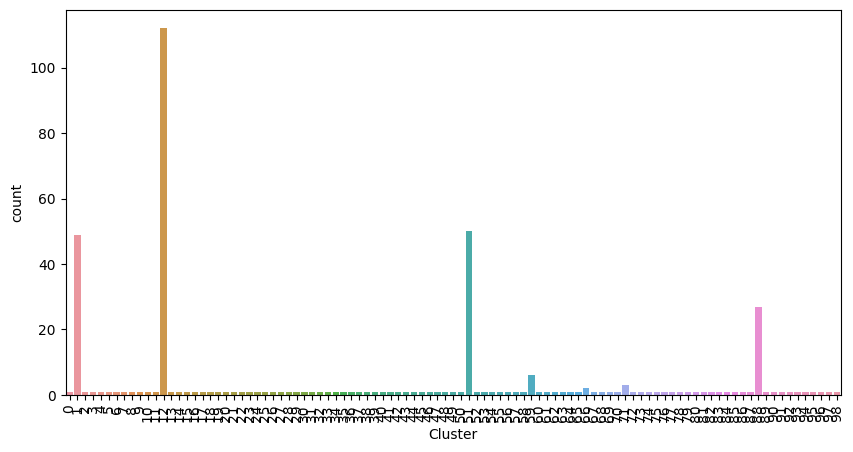

In [ ]:
# plt.xticks(rotation=45, ha='right')
plt.figure(figsize=(10,5))
chart = sns.countplot(x=clusters_df["Cluster"])
chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
